# Our problem that we want to solve is "Cold Start Recommendation " problem

The cold start recommendation problem is a recommender system needs to provide recommendations to a new user or for a new item, but has little or no information about the user's preferences or the item's characteristics (user's history), it arises when there is new users or items that have not been previously rated or evaluated.

Usage of 2 datasets:

* 'sbr.csv' which is the source dataset (ex:it will be the train data)
* 'cold start 70' which is the target dataset (ex: it will be the testing data)

Dataset of cold start with the 70%, to train on the large number of the cold start, also there is a percent of another recommendation system(none cold start)

In [1]:
 # import libiraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import torch.utils.data as data_utils
from torch.utils.data.distributed import DistributedSampler
import torch.nn as nn
import time
from copy import deepcopy
from torch.utils.tensorboard import SummaryWriter
import torch.nn.functional as F
import math
from sklearn.preprocessing import LabelEncoder

In [2]:
all_data_70 =pd.read_csv('cold_data_0.7.csv')#read the data
all_data_70.head(7)#get the first 7 rows

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
0,393219,73342,1.0,2,2,73,1,0,25.0,3,3.0,12000,120,1.0,True,4.0,False,False,False,False
1,393219,17695,1.0,2,2,29552,209,84,43.0,3,3.0,11204,112,2.0,True,19.0,False,False,False,False
2,393219,40457,1.0,2,2,20285,242,90,43.0,4,7.0,10203,102,6.0,True,104.0,False,False,False,False
3,917512,60594,1.0,1,4,485,1,0,45.0,2,3.0,12103,121,6.0,True,15.0,False,False,False,False
4,917512,8575,1.0,1,4,9850,11,14,42.0,2,3.0,12108,121,6.0,True,37.0,False,False,False,False
5,917512,23209,1.0,1,4,59767,112,47,70.0,2,3.0,12100,121,5.0,True,55.0,False,False,False,False
6,917512,81155,1.0,1,4,5912,25,8,126.0,4,5.0,12412,124,7.0,True,311.0,False,False,False,False


In [3]:
all_data =pd.read_csv('sbr_data_1M.csv')# read the data
all_data.head(7)#get the first 7 rows

C:\Users\hp\AppData\Local\Temp\ipykernel_13276\695837345.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data =pd.read_csv('sbr_data_1M.csv')# read the data


,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
0,1,1,1,0,0,0,1,1,1,4
1,1,2,1,0,0,0,1,1,1,4
2,1,3,1,0,0,0,0,1,1,4
3,1,80936,1,0,0,0,1,1,1,4
4,1,781,1,0,0,0,1,1,1,4
5,1,111774,1,0,0,0,1,1,1,4
6,1,1230,1,0,0,0,1,1,1,4


For each dataset we will:

1. Show the shape  
2. Check for the dublicates
3. Remove the dublicates
4. Check for the nulls
5. Show inforamtion
6. Describe the data(min, max, mean,....)

In [4]:
all_data_70.shape #shape

(1263750, 20)

In [5]:
all_data.shape #shape

(38300254, 10)

In [6]:
all_data_70.duplicated().sum() #check for the dublicates

49128

In [7]:
all_data.duplicated().sum() #check for the dublicates

26455

In [8]:
all_data_70 = all_data_70.drop_duplicates() #drop the duplicates
all_data_70.duplicated().sum()

0

In [9]:
all_data = all_data.drop_duplicates() #drop the duplicates
all_data.duplicated().sum()

0

In [10]:
all_data_70.isna().sum() # check for the nulls

user_id            0
item_id            0
click              0
gender             0
age                0
click_count        0
like_count         0
comment_count      0
read_percentage    0
item_score1        0
item_score2        0
category_second    0
category_first     0
item_score3        0
read               0
read_time          0
share              0
like               0
follow             0
favorite           0
dtype: int64

In [11]:
all_data.isna().sum() # check for the nulls

user_id           0
item_id           0
click             0
follow            0
like              0
share             0
video_category    0
watching_times    0
gender            0
age               0
dtype: int64

In [12]:
all_data_70.info() #information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214622 entries, 0 to 1263749
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   user_id          1214622 non-null  int64  
 1   item_id          1214622 non-null  int64  
 2   click            1214622 non-null  float64
 3   gender           1214622 non-null  int64  
 4   age              1214622 non-null  int64  
 5   click_count      1214622 non-null  int64  
 6   like_count       1214622 non-null  int64  
 7   comment_count    1214622 non-null  int64  
 8   read_percentage  1214622 non-null  float64
 9   item_score1      1214622 non-null  int64  
 10  item_score2      1214622 non-null  float64
 11  category_second  1214622 non-null  int64  
 12  category_first   1214622 non-null  int64  
 13  item_score3      1214622 non-null  float64
 14  read             1214622 non-null  bool   
 15  read_time        1214622 non-null  float64
 16  share            1

In [13]:
all_data.info() #information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38273799 entries, 0 to 38300253
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   item_id         int64 
 2   click           int64 
 3   follow          int64 
 4   like            int64 
 5   share           int64 
 6   video_category  object
 7   watching_times  int64 
 8   gender          int64 
 9   age             int64 
dtypes: int64(9), object(1)
memory usage: 3.1+ GB


In [14]:
all_data_70.describe(include="all")#describtion of the data

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
count,1.214622e+06,1.214622e+06,1214622.0,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1214622,1.214622e+06,1214622,1214622,1214622,1214622
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1173993,NaN,1200537,1197878,1213570,1207596
mean,6.006034e+05,1.113305e+05,1.0,1.312379e+00,2.659836e+00,1.385008e+05,1.844415e+03,7.819126e+02,5.035153e+01,3.028539e+00,3.085788e+00,1.141439e+04,1.144051e+02,4.575986e+00,NaN,5.457993e+01,NaN,NaN,NaN,NaN
std,3.151841e+05,7.002787e+04,0.0,4.691315e-01,1.246628e+00,3.262731e+05,5.854209e+03,1.625526e+03,2.885661e+01,7.473533e-01,6.358638e-01,1.383343e+03,1.284034e+01,4.207978e+00,NaN,7.784686e+01,NaN,NaN,NaN,NaN
min,1.100000e+01,1.480000e+02,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,3.132040e+05,2.816000e+04,1.0,1.000000e+00,2.000000e+00,1.345825e+04,7.300000e+01,5.900000e+01,2.900000e+01,3.000000e+00,3.000000e+00,1.080200e+04,1.080000e+02,3.000000e+00,NaN,7.000000e+00,NaN,NaN,NaN,NaN
50%,6.770930e+05,1.385340e+05,1.0,1.000000e+00,2.000000e+00,4.707500e+04,2.930000e+02,2.620000e+02,4.700000e+01,3.000000e+00,3.000000e+00,1.120100e+04,1.120000e+02,5.000000e+00,NaN,2.740491e+01,NaN,NaN,NaN,NaN
75%,8.863370e+05,1.666640e+05,1.0,2.000000e+00,3.000000e+00,1.346530e+05,1.019000e+03,8.410000e+02,6.700000e+01,4.000000e+00,3.000000e+00,1.210300e+04,1.210000e+02,6.000000e+00,NaN,7.236723e+01,NaN,NaN,NaN,NaN


In [15]:
all_data.describe(include="all")#describtion of the data

,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
count,3.827380e+07,3.827380e+07,38273799.0,3.827380e+07,3.827380e+07,3.827380e+07,38273799,3.827380e+07,3.827380e+07,3.827380e+07
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,20123789,NaN,NaN,NaN
mean,4.555042e+05,5.188481e+05,1.0,3.486354e-03,3.985303e-02,4.028056e-03,NaN,1.490815e+00,1.024654e+00,2.041362e+00
std,2.810566e+05,7.546025e+05,0.0,5.894234e-02,1.956138e-01,6.333901e-02,NaN,2.067165e+00,6.404795e-01,1.245017e+00
min,1.000000e+00,1.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.126830e+05,7.845000e+03,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00,2.000000e+00
50%,4.382660e+05,5.662500e+04,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00,2.000000e+00
75%,6.848840e+05,1.353829e+06,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2.000000e+00,1.000000e+00,3.000000e+00


# Here, we just want to see the correlation between the columns and each other

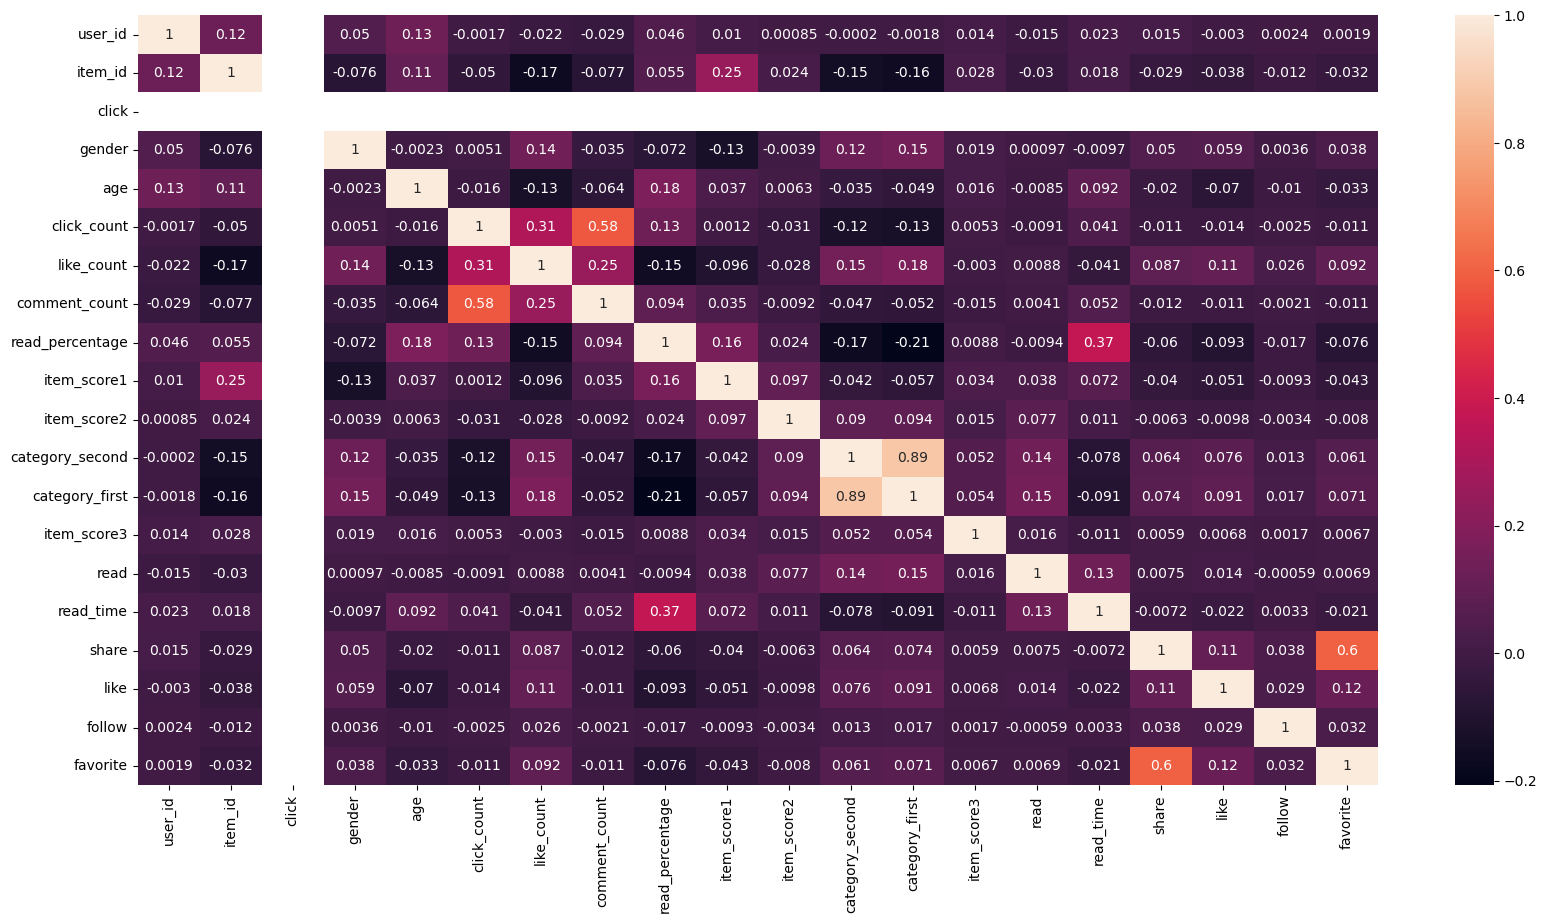

In [16]:
#plotting the heatmap for correlation
ax = pyplot.subplots(figsize=(20, 10))
ax = sns.heatmap(all_data_70.corr(), annot=True)

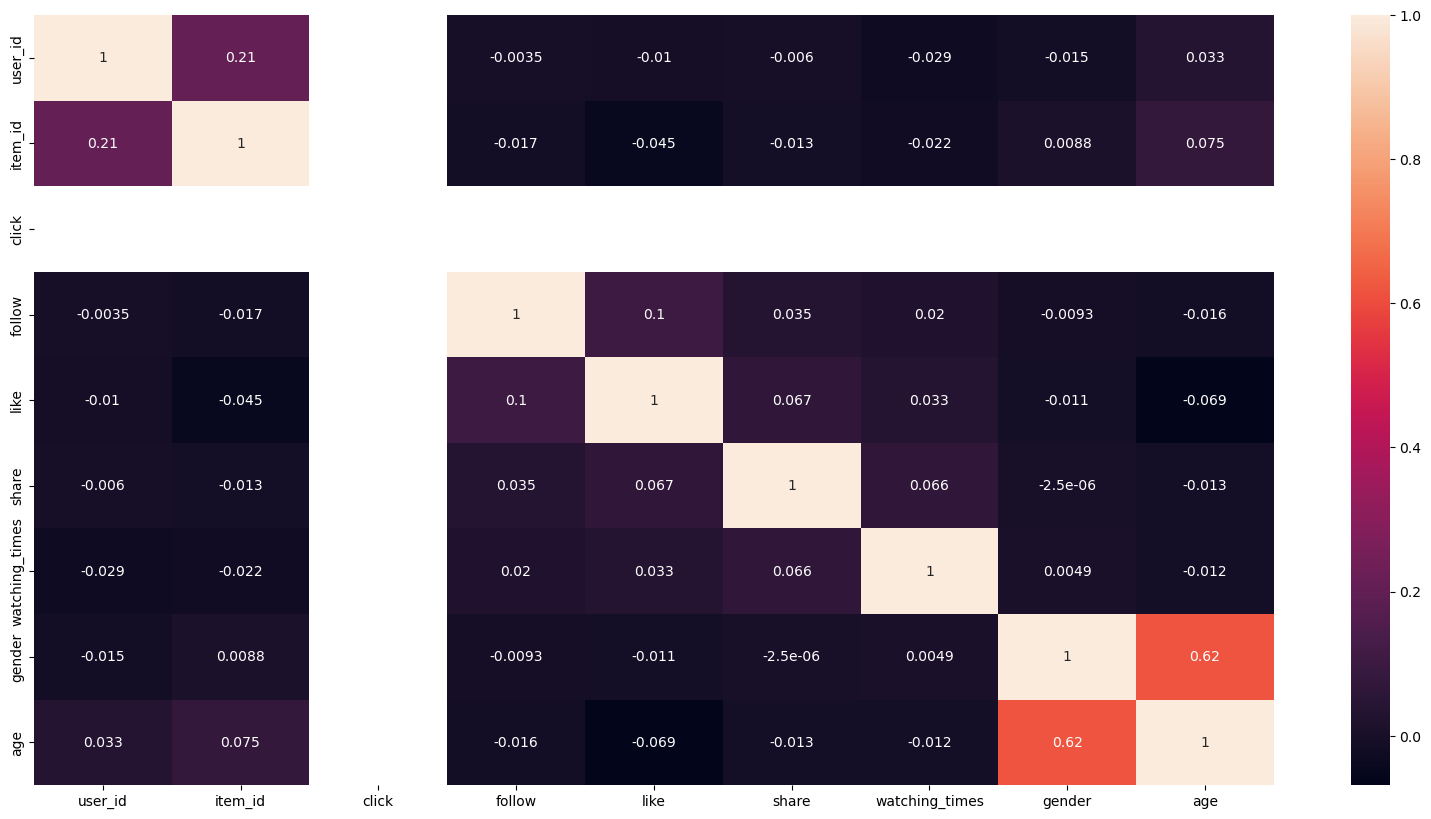

In [17]:
#plotting the heatmap for correlation
ax = pyplot.subplots(figsize=(20, 10))
ax = sns.heatmap(all_data.select_dtypes(include=np.number).corr(), annot=True)

We found that the highest correlation is between the first category and the second category in the dataset for the cold start with 70%

While in the sbr dataset , the highest correlation is between gender and age

# We will see the data that has unlogical labels

We removed the "0" from the age and the gender as we assumed that they were:

No age or gender with values equal to "0"

That's for the gender

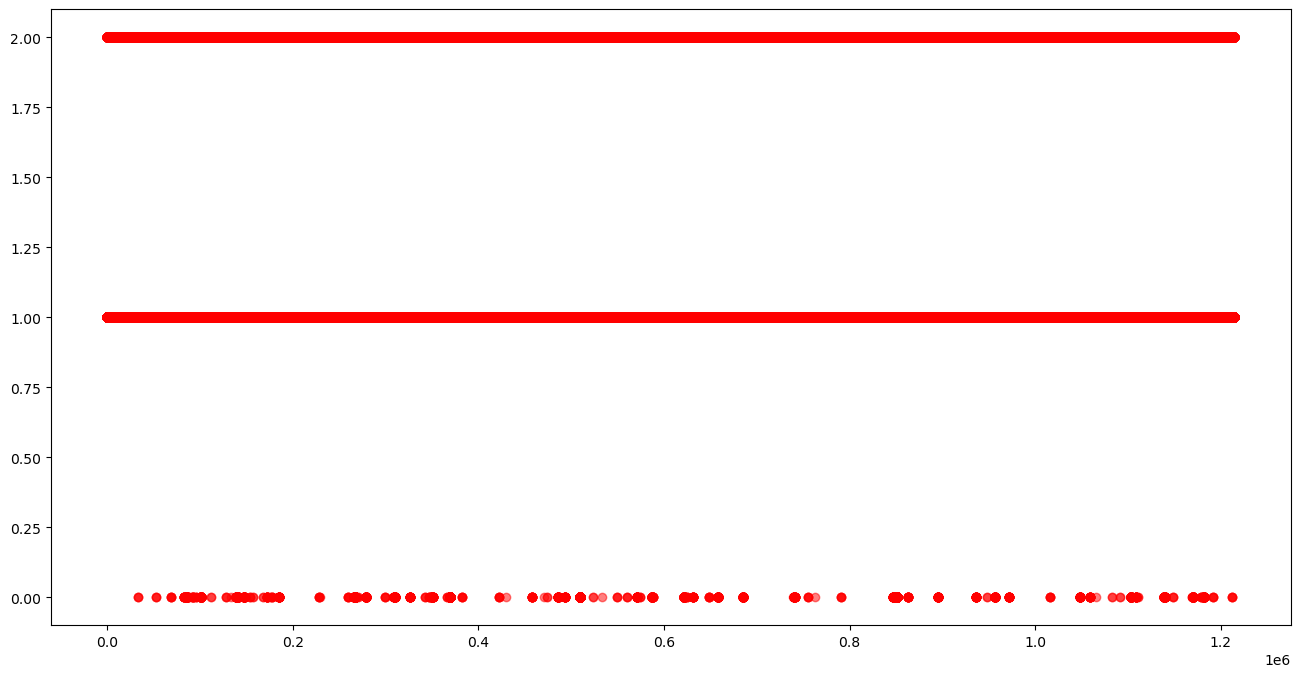

In [18]:
# Create a list of consecutive integers
s=all_data_70['gender']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

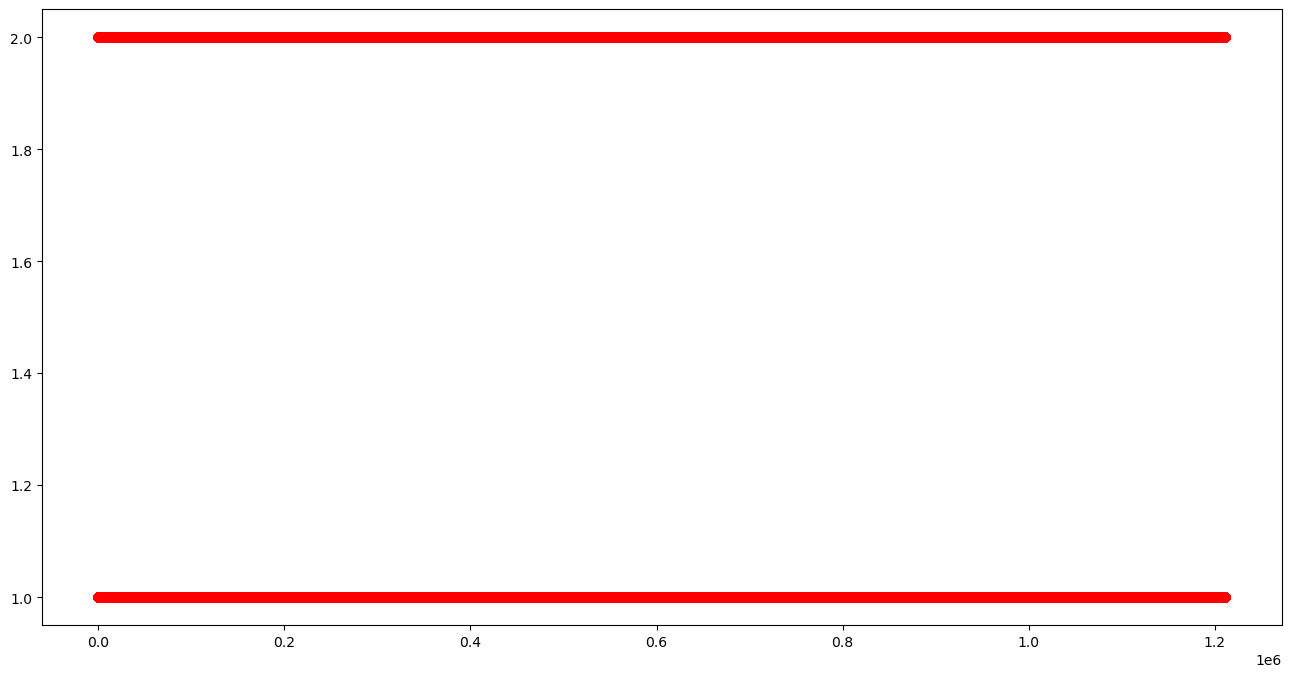

In [19]:
## removing the outliers from the target column

all_data_70 = all_data_70[all_data_70['gender'] >= 1]

## plotting the outlier against the constinous distn. in a scatter plot again to check
# Create a list of consecutive integers
s=all_data_70['gender']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

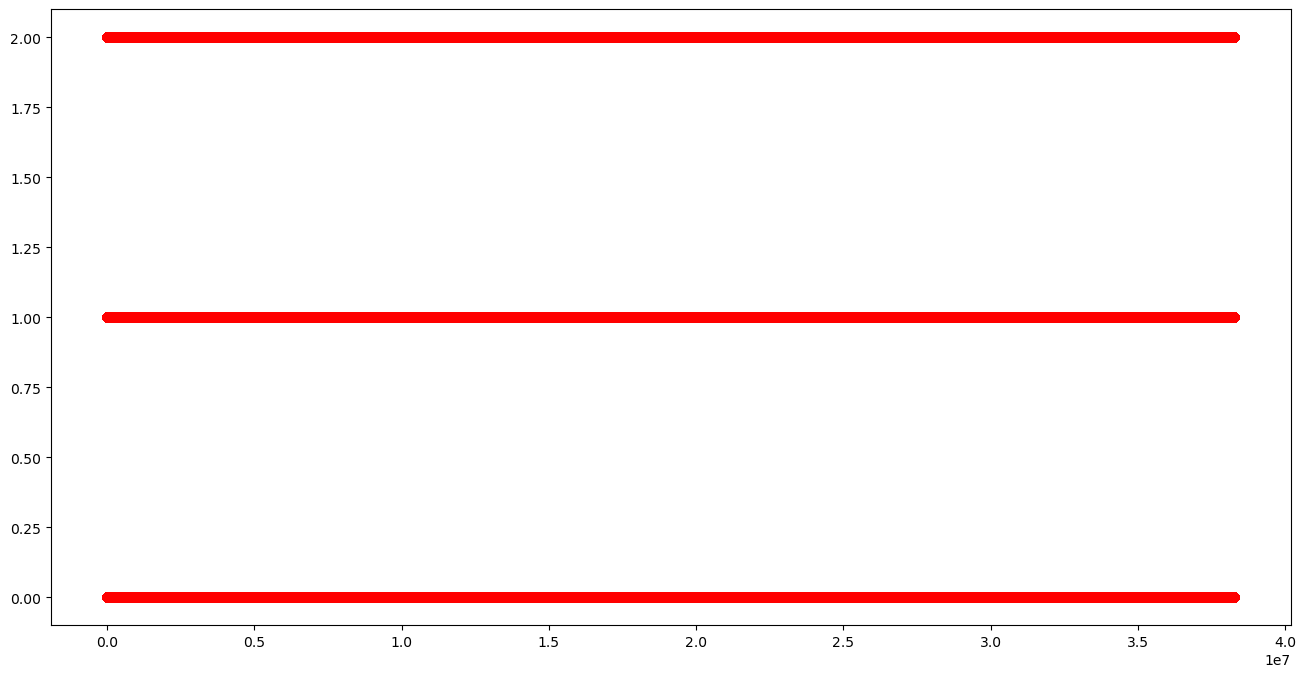

In [20]:
# Create a list of consecutive integers
s=all_data['gender']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

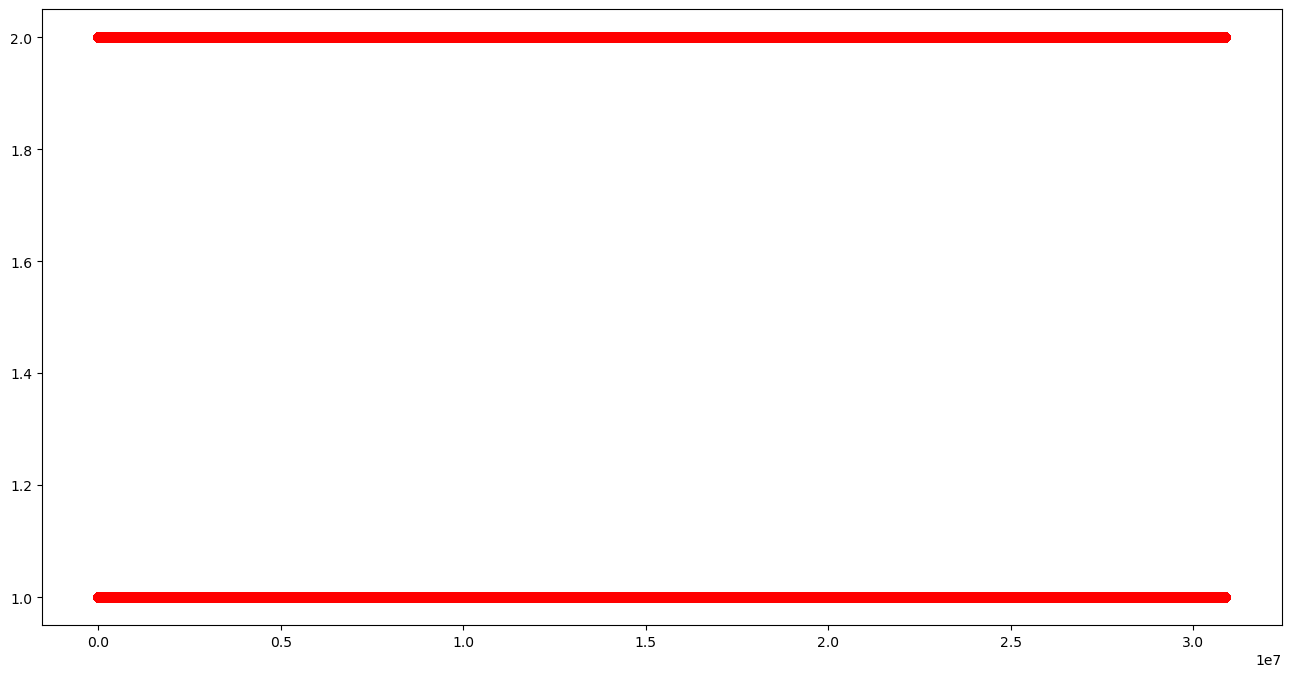

In [21]:
## removing the outliers from the target column

all_data = all_data[all_data['gender'] >= 1]

## plotting the outlier against the constinous distn. in a scatter plot again to check
# Create a list of consecutive integers
s=all_data['gender']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

In [22]:
# Here, we just want to make sure that ther are 2 categories only (male, female from our assumption)
all_data_70['gender'].unique()

array([2, 1], dtype=int64)

In [23]:
# Here, we just want to make sure that ther are 2 categories only (male, female from our assumption)
all_data['gender'].unique()

array([1, 2], dtype=int64)

That's for the age

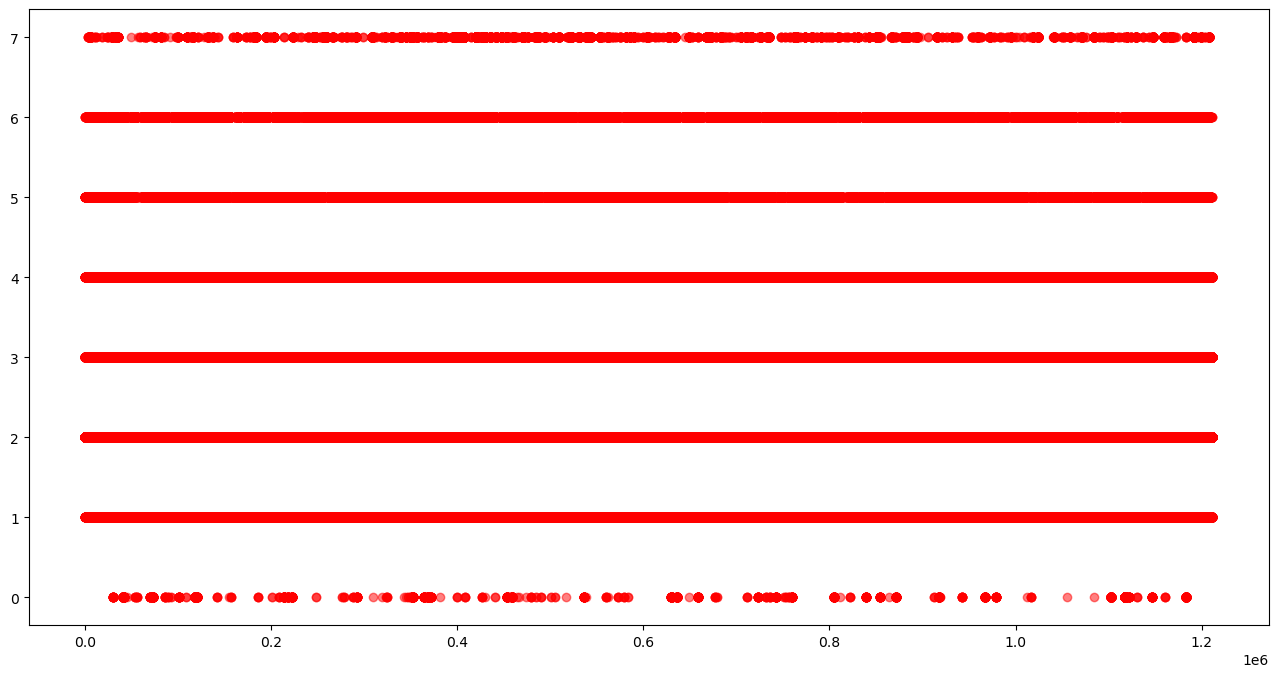

In [24]:
# Create a list of consecutive integers
s=all_data_70['age']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

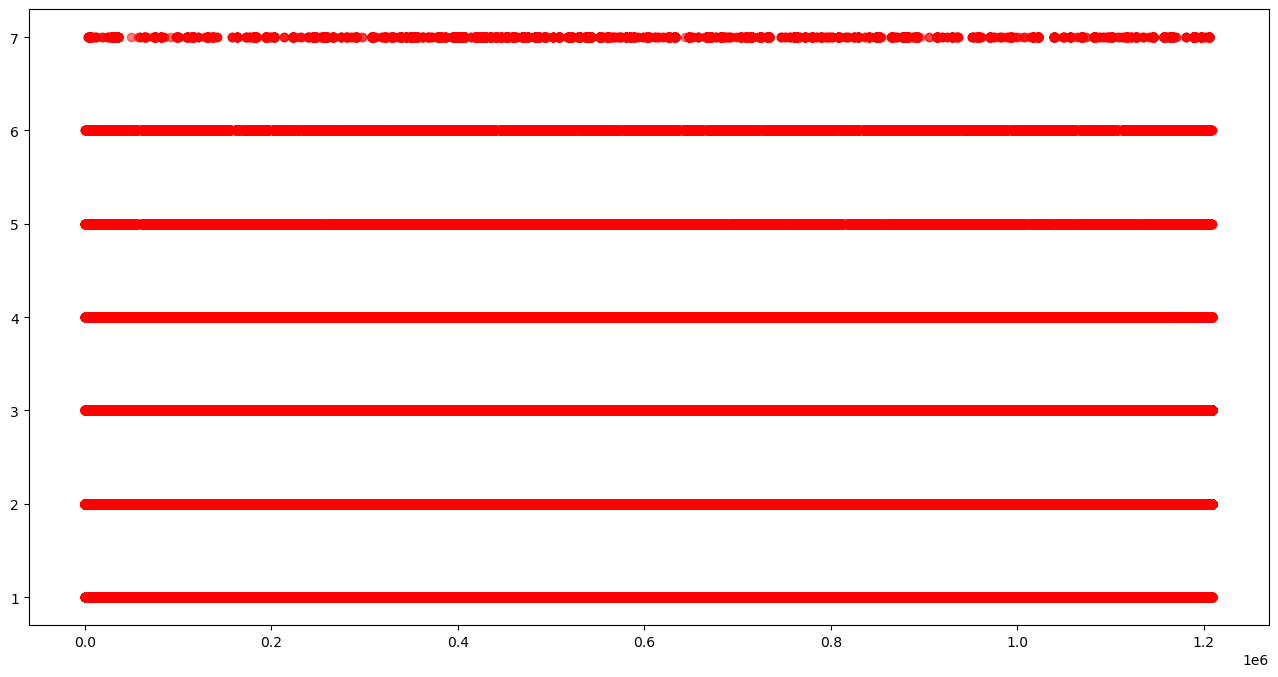

In [25]:
## removing the outliers from the target column

all_data_70 = all_data_70[all_data_70['age'] >= 1]

## plotting the outlier against the constinous distn. in a scatter plot again to check
# Create a list of consecutive integers
s=all_data_70['age']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

In [26]:
# Here, we just want to make sure that ther are 7 categories only (1->7 from our assumption)
all_data_70['age'].unique()

array([2, 4, 3, 6, 5, 1, 7], dtype=int64)

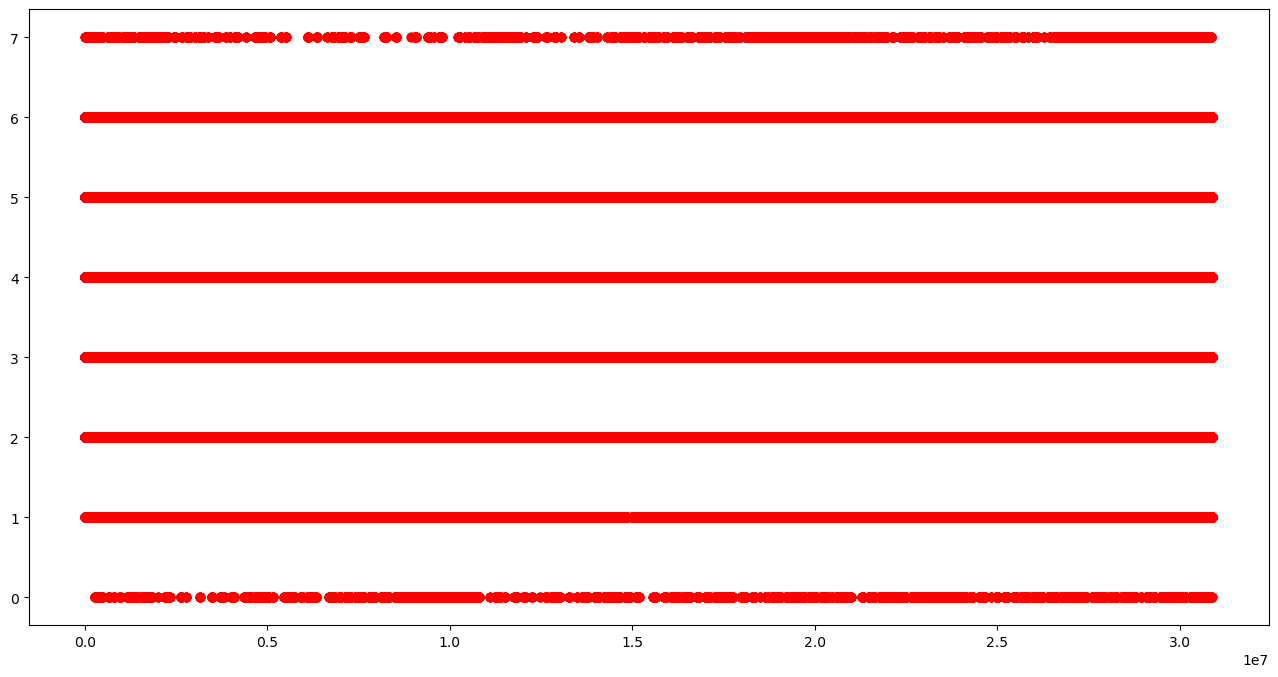

In [27]:
# Create a list of consecutive integers
s=all_data['age']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

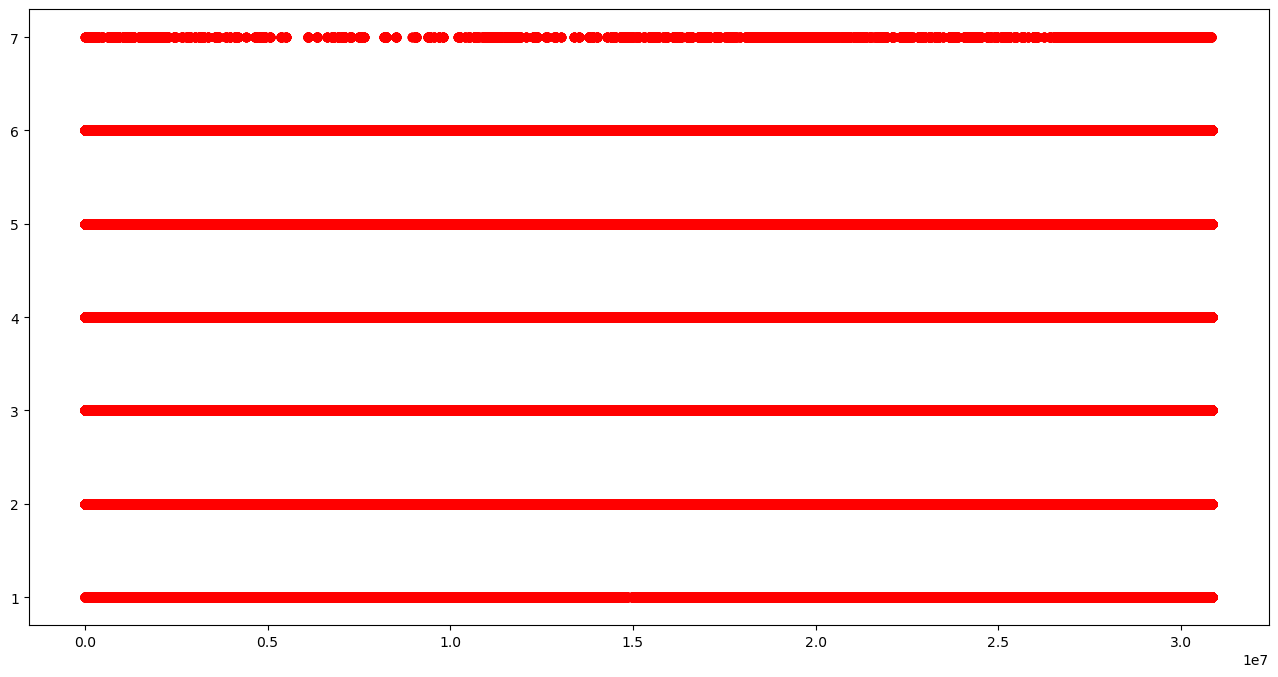

In [28]:
## removing the outliers from the target column

all_data = all_data[all_data['age'] >= 1]

## plotting the outlier against the constinous distn. in a scatter plot again to check
# Create a list of consecutive integers
s=all_data['age']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

In [29]:
# Here, we just want to make sure that ther are 7 categories only (1->7 from our assumption)
all_data['age'].unique()

array([4, 2, 5, 3, 6, 7, 1], dtype=int64)

# We will make some aggregations on the data

As we want our data in separated way (as it did not contain only cold-start )

So , we can not make aggregation and use it in the following steps and the model

So, we will make sum aggregations on the data to analysis it only

In [30]:
all_data_70_agg = all_data_70.groupby('user_id').agg({'click_count': 'sum','read_percentage':'mean','read_time':'sum'}).reset_index()
all_data_70_agg

,user_id,click_count,read_percentage,read_time
0,11,3348472,50.928571,631.000000
1,24,299349,71.000000,17.000000
2,33,493135,16.200000,124.000000
3,44,54415,37.000000,109.000000
4,71,1437583,65.500000,773.000000
...,...,...,...,...
68430,1000005,24162,24.000000,9.000000
68431,1000010,4610,67.000000,12.000000
68432,1000011,66235,15.000000,20.946036
68433,1000013,40978,43.500000,133.000000


In [31]:
all_data_70_useritem=all_data_70.groupby('user_id').agg({'item_id': 'count'}).reset_index()
all_data_70_useritem

,user_id,item_id
0,11,14
1,24,2
2,33,5
3,44,1
4,71,18
...,...,...
68430,1000005,1
68431,1000010,1
68432,1000011,2
68433,1000013,4


In [32]:
all_data_agg = all_data.groupby('user_id').agg({'watching_times': 'sum'}).reset_index()
all_data_agg

,user_id,watching_times
0,1,71
1,2,23
2,3,63
3,4,34
4,5,100
...,...,...
808258,1000010,56
808259,1000011,32
808260,1000013,40
808261,1000014,17


In [33]:
all_data_useritem=all_data.groupby('user_id').agg({'item_id': 'count'}).reset_index()
all_data_useritem

,user_id,item_id
0,1,71
1,2,15
2,3,37
3,4,27
4,5,53
...,...,...
808258,1000010,53
808259,1000011,24
808260,1000013,36
808261,1000014,10


**For the 70%**

Here, we got :
1. the sum of the click_counts -> as we want to see the total number of clicks
2. the average of the read_percentage
3. the total number of each read_time
4. the count of the item id

**For the sbr dataset**

Here, we got :
1. the count of item_id
2. the sum of watching_times'

In this dataset, we did not need the test of hypothesis or any feature engineering or feature extraction

# We need to do some sort of preparing the data to be able to standarizied and modelled

In [34]:
all_data_70.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209286 entries, 0 to 1263749
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   user_id          1209286 non-null  int64  
 1   item_id          1209286 non-null  int64  
 2   click            1209286 non-null  float64
 3   gender           1209286 non-null  int64  
 4   age              1209286 non-null  int64  
 5   click_count      1209286 non-null  int64  
 6   like_count       1209286 non-null  int64  
 7   comment_count    1209286 non-null  int64  
 8   read_percentage  1209286 non-null  float64
 9   item_score1      1209286 non-null  int64  
 10  item_score2      1209286 non-null  float64
 11  category_second  1209286 non-null  int64  
 12  category_first   1209286 non-null  int64  
 13  item_score3      1209286 non-null  float64
 14  read             1209286 non-null  bool   
 15  read_time        1209286 non-null  float64
 16  share            1

In [35]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30856954 entries, 0 to 38300243
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   item_id         int64 
 2   click           int64 
 3   follow          int64 
 4   like            int64 
 5   share           int64 
 6   video_category  object
 7   watching_times  int64 
 8   gender          int64 
 9   age             int64 
dtypes: int64(9), object(1)
memory usage: 2.5+ GB


We will not apply the satndarization on the categorical or the ids (as it can not be in specific range )

We will remove the categorical, user_id and item_id columns to give it to the standarized function


In [36]:
all_data_70_drop_category=all_data_70.drop(['gender','age','click','user_id','item_id','read','share','like','follow','favorite'],axis=1)#70%

In [37]:
all_data_drop_category=all_data.drop(['gender','age','follow','like','share','click','user_id','item_id','video_category'],axis=1)#sbr

Store the categorical columns in varibles to use it later in the model (concate it with the standarized data)

In [38]:
all_data_70_category=all_data_70.drop(['click_count','like_count','comment_count','read_percentage','item_score1','item_score2','category_second','category_first','item_score3','read_time'],axis=1)

In [39]:
all_data_category=all_data.drop(['watching_times'],axis=1)

# We will standarize the data

now, we will standardize the data to be in specific range and not to make the model baised to a certain numbers

In [40]:
# For the 705 cold start
scaler = StandardScaler()
standardized_data_07 = scaler.fit_transform(all_data_70_drop_category)
print(standardized_data_07)

[[-0.42443443 -0.31493717 -0.48115491 ...  0.43662703 -0.84958219
  -0.64966686]
 [-0.33420524 -0.27939701 -0.42953768 ... -0.18676406 -0.61198318
  -0.45704095]
 [-0.36256963 -0.27375842 -0.42585073 ... -0.96600291  0.33841284
   0.63450587]
 ...
 [-0.29005326 -0.27820094 -0.40250008 ... -1.12185069 -0.84958219
   0.81429005]
 [-0.40719603 -0.28845291 -0.4682506  ... -0.42053572 -0.84958219
   0.04378641]
 [-0.40836526 -0.31271591 -0.43936953 ...  0.43662703 -0.84958219
   0.15936196]]


In [41]:
# For the sbr dataset
scaler = StandardScaler()
standardized_data = scaler.fit_transform(all_data_drop_category)
print(standardized_data)

[[-0.23979369]
 [-0.23979369]
 [-0.23979369]
 ...
 [-0.23979369]
 [-0.23979369]
 [-0.23979369]]


In [42]:
all_data_drop_category.select_dtypes

<bound method DataFrame.select_dtypes of           watching_times
0                      1
1                      1
2                      1
3                      1
4                      1
...                  ...
38300239               2
38300240               2
38300241               1
38300242               1
38300243               1

[30856954 rows x 1 columns]>

In [43]:
standardized_data_07 = pd.DataFrame(standardized_data_07, columns=all_data_70_drop_category.columns)
standardized_data_07

,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read_time
0,-0.424434,-0.314937,-0.481155,-0.879409,-0.037363,-0.135008,0.424193,0.436627,-0.849582,-0.649667
1,-0.334205,-0.279397,-0.429538,-0.255359,-0.037363,-0.135008,-0.151725,-0.186764,-0.611983,-0.457041
2,-0.362570,-0.273758,-0.425851,-0.255359,1.300024,6.154945,-0.875962,-0.966003,0.338413,0.634506
3,-0.423173,-0.314937,-0.481155,-0.186020,-1.374750,-0.135008,0.498715,0.514551,0.338413,-0.508408
4,-0.394509,-0.313229,-0.472552,-0.290028,-1.374750,-0.135008,0.502332,0.514551,0.338413,-0.225890
...,...,...,...,...,...,...,...,...,...,...
1209281,0.264024,-0.023269,0.682691,0.576708,-0.037363,-0.135008,-0.153172,-0.186764,-0.136785,-0.367149
1209282,-0.203926,-0.249495,-0.301109,0.230014,1.300024,-0.135008,0.066777,0.047008,0.338413,-0.418516
1209283,-0.290053,-0.278201,-0.402500,-0.047342,-1.374750,-0.135008,-1.021389,-1.121851,-0.849582,0.814290
1209284,-0.407196,-0.288453,-0.468251,0.611378,-0.037363,-0.135008,-0.370949,-0.420536,-0.849582,0.043786


In [44]:
standardized_data = pd.DataFrame(standardized_data, columns=all_data_drop_category.columns)
standardized_data

,watching_times
0,-0.239794
1,-0.239794
2,-0.239794
3,-0.239794
4,-0.239794
...,...
30856949,0.243892
30856950,0.243892
30856951,-0.239794
30856952,-0.239794


We will concatnate the categorical columns with the standarized data to apply the model on it

In [45]:
all_data_70_final_data=pd.concat([standardized_data_07,all_data_70_category],axis=1)

In [46]:
all_data_final_data=pd.concat([standardized_data,all_data_category],axis=1)

Summary for all the followind steps:
* We applied some preprocessing on the data
1. Removed the duplicates
2. Made some preprocessing on the data to standarize it
3. Standarized rthe data
4. The data did not need tests of hypothesis or feature enginnering (in my point of view)

Now, we will split the data and apply the model on it

# Now, we will split the data to train and test on the standarized data and apply the model

We have used this site as a
Reference:
    [1]Fajie Yuan et al. Parameter-efficient transfer from sequential behaviors for user modeling and recommendation. In SIGIR, pages 1469–1478, 2020.

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score

In [48]:
#utils.py
def get_train_loader(dataset, is_parallel = False):
    """
    This cell defines the functions to create data loaders for your training, validation, and testing datasets.
    Data loaders are PyTorch's way to handle large datasets that can't fit into memory.
    They allow you to load data in small batches, rather than all at once.
    """
    if is_parallel:
        # Create a distributed data loader using PyTorch's DistributedSampler class
        dataloader = data_utils.DataLoader(dataset, batch_size=1024, sampler=DistributedSampler(dataset))
    else:
        # Create a regular data loader with a batch size of 1024 and shuffle the data
        dataloader = data_utils.DataLoader(dataset, batch_size=1024, shuffle=True, pin_memory=True)
    return dataloader

def get_val_loader(dataset, is_parallel = False):
    """
    This function creates a data loader for the validation dataset.

    Args:
        dataset: PyTorch dataset object containing the validation data.
        is_parallel: Boolean flag indicating whether to use distributed data loading.
                     Defaults to False.

    Returns:
        A PyTorch DataLoader object for the validation dataset.
    """
    if is_parallel:
         # Create a distributed data loader using PyTorch's DistributedSampler class
        dataloader = data_utils.DataLoader(dataset, batch_size=1024, sampler=DistributedSampler(dataset))
    else:
         # Create a regular data loader with a batch size of 1024 and do not shuffle the data
        dataloader = data_utils.DataLoader(dataset, batch_size=1024, shuffle=False, pin_memory=True)
    return dataloader

def get_test_loader(dataset, is_parallel = False):
    """
    This function creates a data loader for the test dataset.

    Args:
        dataset: PyTorch dataset object containing the test data.
        is_parallel: Boolean flag indicating whether to use distributed data loading.
                     Defaults to False.

    Returns:
        A PyTorch DataLoader object for the test dataset.
    """
    if is_parallel:
        # Create a distributed data loader using PyTorch's DistributedSampler class
        dataloader = data_utils.DataLoader(dataset, batch_size=1024, sampler=DistributedSampler(dataset))
    else:
        # Create a regular data loader with a batch size of 1024 and do not shuffle the data
        dataloader = data_utils.DataLoader(dataset, batch_size=1024, shuffle=False, pin_memory=True)
    return dataloader

In [63]:
class ColdResetDF:
    def __init__(self):
        self.item_enc1 = LabelEncoder()
        self.item_enc2 = LabelEncoder()
        self.user_enc = LabelEncoder()

    def fit_transform(self, df1, df2):
        df = pd.concat([df1['user_id'], df2['user_id']], ignore_index=True)
        df = self.user_enc.fit_transform(df) + 1
        df1['item_id'] = self.item_enc1.fit_transform(df1['item_id']) + 1
        df1['user_id'] = df[:len(df1)]
        df2['item_id'] = self.item_enc2.fit_transform(df2['item_id']) + 1
        df2['user_id'] = df[len(df1):]
        return df1, df2

    def inverse_transform(self, df):
        df['item_id'] = self.item_enc1.inverse_transform(df['item_id'] - 1)
        df['user_id'] = self.user_enc.inverse_transform(df['user_id'] - 1)
        return df


In [64]:
class ItemResetDF:
    def __init__(self):
        self.item_enc = LabelEncoder()

    def fit_transform(self, df):
        df['item_id'] = self.item_enc.fit_transform(df['item_id']) + 1
        return df

    def inverse_transform(self, df):
        df['item_id'] = self.item_enc.inverse_transform(df['item_id'] - 1)
        return df

In [65]:
def construct_data(task, item_min):
    if task != 2:
        df1 = all_data_70_final_data[['user_id', 'item_id', 'age', 'gender', 'click']]
#         df1 = pd.read_csv(path1, usecols=['user_id', 'item_id', 'click'])
        df1 = df1[df1.click == 1]
    else:
        df1 = all_data_70_final_data[['user_id', 'item_id', 'age', 'gender', 'like']]
        df1 = df1[df1.like == 1]

    df2 = all_data_final_data[['user_id', 'item_id', 'age', 'gender', 'click']]
    df2 = df2[df2.click == 1]

    user_counts = df2.groupby('user_id').size()
    user_subset = np.in1d(df2.user_id, user_counts[user_counts >= item_min].index)
    df2 = df2[user_subset].reset_index(drop=True)

    assert (df2.groupby('user_id').size() < item_min).sum() == 0
    s_item_count = len(set(df2['item_id']))

    reset_ob = ColdResetDF()
    df2, df1 = reset_ob.fit_transform(df2, df1)

    user1 = set(df1.user_id.values.tolist())
    user2 = set(df2.user_id.values.tolist())
    user = user1 & user2
    df1 = df1[df1.user_id.isin(list(user))]
    df2 = df2[df2.user_id.isin(list(user))]

    new_data1 = []
    new_data2 = []
    for u in tqdm(user):
        tmp_data2 = df2[df2.user_id == u][:-3].values.tolist()
        tmp_data1 = df1[df1.user_id == u].values.tolist()
        new_data1.extend(tmp_data1)
        new_data2.extend(tmp_data2)
    new_data1 = pd.DataFrame(new_data1, columns=df1.columns)
    new_data2 = pd.DataFrame(new_data2, columns=df2.columns)
    user_count = len(set(new_data1.user_id.values.tolist()))

    reset_item = ItemResetDF()
    new_data1 = reset_item.fit_transform(new_data1)

    t_item_count = len(set(new_data1['item_id']))
    print(new_data1.columns)
    return new_data1, new_data2, user_count, t_item_count, s_item_count

In [66]:
#utils.py
def colddataset(item_min, task):
    """This function constructs a cold start recommendation dataset from the data returned by the `construct_data` function.
    It creates a dictionary of user histories from the source dataset and a dictionary of target items from the target dataset.
    It then iterates over the target items and appends each one to its corresponding user's history,
    along with a special padding value of 0.
    It creates a new Pandas dataframe with the resulting source and target sequences and returns
    it along with some summary statistics.

    Args:
        item_min (int): The minimum number of items a user must have clicked on in the second dataset.
        task (int): The task to perform. If task is not 2, the function selects the 'click' column from the 'cold_data_0.3.csv' dataset. Otherwise, it selects the 'like' column from the same dataset.

    Returns:
        A tuple containing four elements:
        - A Pandas dataframe containing the source and target sequences for each example in the cold start recommendation dataset.
        - The number of selected users in the dataset.
        - The number of items in the original 'sbr_data_1M.csv' dataset.
        - The number of items in the resulting dataset for cold start recommendation.
    """
    target_data, source_data, user_count, t_item_count, s_item_count = construct_data(task, item_min)
    
    print("+++user_history+++")
    user_history = source_data.groupby('user_id').item_id.apply(list).to_dict()
    target = target_data.groupby('user_id').item_id.apply(list).to_dict()
    
    # Modified part to include age and gender
    age_gender_mapping = target_data.groupby('user_id').agg({'age': 'first', 'gender': 'first'}).to_dict()
    
    examples = []
    for u, t_list in tqdm(target.items()):
        for t in t_list:
            # Modified part to include age and gender in examples
            age_val = age_gender_mapping['age'][u]
            gender_val = age_gender_mapping['gender'][u]
            e_list = [user_history[u] + [0], t, age_val, gender_val]  # Add age and gender to the example list
            examples.append(e_list)
    examples = pd.DataFrame(examples, columns=['source', 'target', 'age', 'gender'])
    return examples, user_count, s_item_count, t_item_count

In [67]:
#utils.py
class ColdDataset(data_utils.Dataset):
    """This class defines a PyTorch dataset for the cold start recommendation task. It takes as input two sequences of item IDs, `x` and `y`,
    a maximum sequence length `max_len`, and a mask token `mask_token`.
    It implements the `__len__` and `__getitem__` methods required by the PyTorch dataset API to enable iteration over the dataset.


    Args:
        x (list): A list of sequences of item IDs.
        y (list): A list of target item IDs.
        max_len (int): The maximum sequence length.
        mask_token (int): The mask token ID.

    Returns:
        A tuple containing two PyTorch tensors:
        - A tensor of shape (max_len,) containing the input sequence with padding if necessary.
        - A tensor of shape (1,) containing the target item ID.
    """
    def __init__(self, x, y, max_len, mask_token):
        self.seqs = x
        self.targets = y
        self.max_len = max_len
        self.mask_token = mask_token

    def __len__(self):
        return len(self.seqs)

    def __getitem__(self, index):
        seq = self.seqs[index]
        target = self.targets[index]
        seq = seq[-self.max_len:]
        seq_len = len(seq)
        seq_mask_len = self.max_len - seq_len
        seq = [0] * seq_mask_len + seq
        return torch.LongTensor(seq), torch.LongTensor([target])


In [68]:
#utils.py
class ColdEvalDataset(data_utils.Dataset):
    """This class defines a PyTorch dataset for evaluating the cold start recommendation task. It takes as input two sequences of item IDs, `x` and `y`, a maximum sequence length `max_len`, a mask token `mask_token`, and the number of items in the dataset `num_item`. It implements the `__len__` and `__getitem__` methods required by the PyTorch dataset API to enable iteration over the dataset.

    Args:
        x (list): A list of sequences of item IDs.
        y (list): A list of target item IDs.
        max_len (int): The maximum sequence length.
        mask_token (int): The mask token ID.
        num_item (int): The number of items in the dataset.

    Returns:
        A tuple containing two PyTorch tensors:
        - A tensor of shape (max_len,) containing the input sequence with padding if necessary.
        - A tensor of shape (num_item+1,) containing the one-hot encoded labels for the target item.
    """
    def __init__(self, x, y, max_len, mask_token, num_item):
        self.seqs = x
        self.targets = y
        self.max_len = max_len
        self.mask_token = mask_token
        self.num_item = num_item + 1

    def __len__(self):
        return len(self.seqs)

    def __getitem__(self, index):
        seq = self.seqs[index]
        target = self.targets[index]
        labels = [0] * self.num_item
        labels[target] = 1
        seq = seq[-self.max_len:]
        seq_len = len(seq)
        seq_mask_len = self.max_len - seq_len
        seq = [self.mask_token] * seq_mask_len + seq
        return torch.LongTensor(seq), torch.LongTensor(labels)

In [ ]:
x_test_for_bias_later = []
y_test_for_bias_later = []

In [90]:
from torch.utils.data import DistributedSampler, DataLoader
#main.py
def get_data(max_len = 20, item_min = 10, task = 2, pad_token = 0):
    """
    This function retrieves the data for the COLD model.

    Args:
        max_len: Maximum length of input sequences. Defaults to 20.
        item_min: Minimum number of times an item must appear in the dataset. Defaults to 10.
        task: Task number for the COLD dataset. Defaults to 2.
        pad_token: Token used for padding shorter sequences. Defaults to 0.

    Returns:
        train_dataloader: PyTorch DataLoader object for the training dataset.
        valid_dataloader: PyTorch DataLoader object for the validation dataset.
        test_dataloader: PyTorch DataLoader object for the test dataset.
        num_users: Number of users in the dataset.
        num_items: Number of items in the dataset.
        num_embeddings: Size of the vocabulary.
    """

    data, user_count, vocab_size, item_count = colddataset(item_min, task)

    # Split data into train, validation, and test sets
    x_train, x_test, y_train, y_test = train_test_split(data[['source', 'age', 'gender']],
                                                        data['target'],
                                                        test_size=0.2,
                                                        random_state=512)
    x_val, x_test, y_val, y_test = train_test_split(x_test,
                                                    y_test,
                                                    test_size=0.5,
                                                    random_state=512)

    x_test_for_bias_later.append(x_test)
    y_test_for_bias_later.append(y_test)

    # Convert the dataframes to arrays and then lists
    x_train = {'seq_column': x_train['source'].values.tolist(),
               'age_column': x_train['age'].values.tolist(),
               'gender_column': x_train['gender'].values.tolist()}
    y_train = y_train.values.tolist()

    x_val = {'seq_column': x_val['source'].values.tolist(),
             'age_column': x_val['age'].values.tolist(),
             'gender_column': x_val['gender'].values.tolist()}
    y_val = y_val.values.tolist()

    x_test = {'seq_column': x_test['source'].values.tolist(),
              'age_column': x_test['age'].values.tolist(),
              'gender_column': x_test['gender'].values.tolist()}
    y_test = y_test.values.tolist()

    train_dataset = ColdDataset(x_train['seq_column'], y_train, max_len, pad_token)
    valid_dataset = ColdEvalDataset(x_val['seq_column'], y_val, max_len, pad_token, item_count)
    test_dataset = ColdEvalDataset(x_test['seq_column'], y_test, max_len, pad_token, item_count)

    num_users = user_count
    num_items = item_count
    num_embeddings = vocab_size

    train_dataloader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
    valid_dataloader = DataLoader(valid_dataset, batch_size=1024, shuffle=False)
    test_dataloader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

    return train_dataloader, valid_dataloader, test_dataloader, num_users, num_items, num_embeddings

In [92]:
#trainer.py
def recalls_and_ndcgs_for_ks(scores, labels, ks):
    """
    This function computes recall and NDCG scores for a given set of predictions and labels.

    Args:
        scores: Tensor containing the predicted scores for each item.
        labels: Tensor containing the true labels for each item.
        ks: List of integers representing the cutoffs for recall and NDCG.

    Returns:
        metrics: Dictionary containing the recall and NDCG scores for each cutoff k.
    """
    metrics = {}
    # Compute the number of correct answers for each user and the total number of answers
    answer_count = labels.sum(1)
    answer_count_float = answer_count.float()
    labels_float = labels.float()
     # Sort the predicted scores and get the indices of the top k items for each user
    rank = (-scores).argsort(dim=1)
    cut = rank
     # Compute recall and NDCG scores for each cutoff k
    for k in sorted(ks, reverse=True):
       cut = cut[:, :k]
       hits = labels_float.gather(1, cut)
       metrics['Recall@%d' % k] = (hits.sum(1) / answer_count_float).mean().item()

       position = torch.arange(2, 2+k)
       weights = 1 / torch.log2(position.float()).to('cpu')
       dcg = (hits * weights).sum(1)
       idcg = torch.Tensor([weights[:min(n, k)].sum() for n in answer_count]).to('cpu')
       ndcg = (dcg / idcg).mean()
       metrics['NDCG@%d' % k] = ndcg

    return metrics

In [93]:
#trainer.py
def Sequence_full_Validate(epoch, model, dataloader, writer, test=False):
    """
    This function performs a full validation pass on the given data using the given model.

    Args:
        epoch: Current epoch number.
        model: PyTorch model to use for validation.
        dataloader: PyTorch DataLoader object for the validation data.
        writer: SummaryWriter object for logging.
        test: Whether to perform testing instead of validation. Defaults to False.

    Returns:
        avg_metrics: Dictionary containing the average recall and NDCG scores for the validation data.
    """
    print("+" * 20, "Valid Epoch {}".format(epoch + 1), "+" * 20)
     # Set the model to evaluation mode
    model.eval()
    # Initialize a dictionary for storing the average recall and NDCG scores
    avg_metrics = {}
    # Initialize a counter for the number of batches processed
    i = 0
    # Iterate over the validation data
    with torch.no_grad():
        tqdm_dataloader = dataloader
        # Move the data to the CPU
        for data in tqdm_dataloader:
            data = [x.to('cpu') for x in data]
            seqs, labels = data
            # Forward pass through the model to get predicted scores
            if test:
                scores = model.predict(seqs)
            else:
                scores = model(seqs)
            scores = scores.mean(1)
            # Compute recall and NDCG scores for the predicted scores and true labels
            metrics = recalls_and_ndcgs_for_ks(scores, labels, [5, 20])
            # Update the average metrics dictionary and the batch counter
            i += 1
            for key, value in metrics.items():
                if key not in avg_metrics:
                    avg_metrics[key] = value
                else:
                    avg_metrics[key] += value
     # Compute the average recall and NDCG score
    for key, value in avg_metrics.items():
        avg_metrics[key] = value / i
         # Log the NDCG scores to TensorBoard
    print(avg_metrics)
    for k in sorted([5, 20], reverse=True):
        writer.add_scalar('Train/NDCG@{}'.format(k), avg_metrics['NDCG@%d' % k], epoch)
#          Return the average recall and NDCG scores
    return avg_metrics


In [94]:
#trainer.py
def SequenceTrainer(epoch, model, dataloader, optimizer, writer): #schedular,
    """
    This function trains the given model on the given data using the given optimizer.

    Args:
        epoch: Current epoch number.
        model: PyTorch model to train.
        dataloader: PyTorch DataLoader object for the training data.
        optimizer: PyTorch optimizer to use for training.
        writer: SummaryWriter object for logging.

    Returns:
        optimizer: PyTorch optimizer after training.
    """
    print("+" * 20, "Train Epoch {}".format(epoch + 1), "+" * 20)
    # Set the model to training mode
    model.train()
    # Initialize a variable for storing the running loss
    running_loss = 0
    # Use cross-entropy loss as the loss function
    loss_fn = nn.CrossEntropyLoss(ignore_index=0)
    # Iterate over the training data
    for data in dataloader:
        # Zero out the gradients
        optimizer.zero_grad()
        data = [x.to('cpu') for x in data]
        seqs, labels = data
         # Forward pass through the model to get logits and compute the loss
        logits = model(seqs) # B x T x V
        logits = logits.mean(1)
        labels = labels.view(-1)
         # Backward pass and optimization step
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.detach().cpu().item()
        # Log the average loss to TensorBoard and print it to the console
    writer.add_scalar('Train/loss', running_loss / len(dataloader), epoch)
    print("Training CE Loss: {:.5f}".format(running_loss / len(dataloader)))
    # Return the optimizer after training
    return optimizer

In [95]:
#trainer.py
def SeqTrain(epochs, model, train_loader, val_loader, writer, is_parallel, is_pretrain, lr, weight_decay, local_rank):
    """
    This function trains the given model on the given training data and validates it on the given validation data.

    Args:
        epochs: Number of training epochs.
        model: PyTorch model to train.
        train_loader: PyTorch DataLoader object for the training data.
        val_loader: PyTorch DataLoader object for the validation data.
        writer: SummaryWriter object for logging.
        is_parallel: Whether to use data parallelism for training. Defaults to False.
        is_pretrain: Whether to use pre-trained model. Defaults to 0.
        lr: Learning rate for optimizer.
        weight_decay: Weight decay for optimizer.
        local_rank: Local rank for distributed training.

    Returns:
        best_model: PyTorch model with the best performance on the validation data.
    """
    # Initialize the optimizer
    if is_pretrain == 0:
        optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),
                                     lr=lr, weight_decay=weight_decay)
    else:
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    model = model.to('cpu')
    if is_parallel:
        model = torch.nn.parallel.DistributedDataParallel(model,  find_unused_parameters=True,device_ids=[local_rank], output_device=local_rank)
    best_metric = 0
    all_time = 0
    val_all_time = 0
    for epoch in range(epochs):
        since = time.time()
        optimizer = SequenceTrainer(epoch, model, train_loader, optimizer, writer)
        tmp = time.time() - since
        print('one epoch train:', tmp)
        all_time += tmp
        val_since = time.time()
        metrics = Sequence_full_Validate(epoch, model, val_loader, writer)
        # Validate the model and measure the time
        val_tmp = time.time() - val_since
        print('one epoch val:', val_tmp)
        val_all_time += val_tmp
        # Update the best model if necessary
        i = 1
        current_metric = metrics['NDCG@5']
        if best_metric <= current_metric:
            best_metric = current_metric
            best_model = deepcopy(model)
            state_dict = model.state_dict()
        else:
            i += 1
            if i == 10:
                print('early stop!')
                break
    # Print the total training and validation times and return the best model
    print('train_time:', all_time)
    print('val_time:', val_all_time)
    return best_model


In [96]:
# -*- coding: utf-8 -*-
'''
Reference:
    [1]Fajie Yuan et al. Parameter-efficient transfer from sequential behaviors for user modeling and recommendation. In SIGIR, pages 1469–1478, 2020.
'''
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.nn.init import uniform_, xavier_normal_, constant_, normal_

class Peter4Coldstart(nn.Module):

    def __init__(self, embedding_size, block_num, dilations, kernel_size, num_items, num_embedding, is_mp, pad_token):
        super(Peter4Coldstart, self).__init__()

        # load parameters info
        self.embedding_size = embedding_size
        self.residual_channels = embedding_size
        self.block_num = block_num
        self.dilations = dilations * self.block_num
        self.kernel_size = kernel_size
        self.output_dim = num_items
        self.vocab_size = num_embedding
        self.is_mp = is_mp

        self.pad_token = pad_token

        # define layers and loss
        self.item_embedding = nn.Embedding(self.vocab_size+1, self.embedding_size, padding_idx=self.pad_token)

        # residual blocks
        rb = [
            ResidualBlock_b_2mp_parallel(
                self.residual_channels, self.residual_channels, kernel_size=self.kernel_size, dilation=dilation, is_mp=self.is_mp
            ) for dilation in self.dilations
        ]
        self.residual_blocks = nn.Sequential(*rb)

        # fully-connected layer
        self.final_layer = nn.Linear(self.residual_channels, self.output_dim+1)

        # parameters initialization
        # self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Embedding):
            stdv = np.sqrt(1. / (self.output_dim+1))
            uniform_(module.weight.data, -stdv, stdv)
        elif isinstance(module, nn.Linear):
            # xavier_normal_(module.weight.data)
            normal_(module.weight.data, 0.0, 0.1)
            if module.bias is not None:
                constant_(module.bias.data, 0.1)

    def forward(self, item_seq):#, pos, neg
        item_seq_emb = self.item_embedding(item_seq)  # [batch_size, seq_len, embed_size]
        # Residual locks
        dilate_outputs = self.residual_blocks(item_seq_emb)
        seq_output = self.final_layer(dilate_outputs)  # [batch_size, embedding_size]hidden

        return seq_output

    def predict(self, item_seq, item):
        item_seq_emb = self.item_embedding(item_seq)  # [batch_size, seq_len, embed_size]
        dilate_outputs = self.residual_blocks(item_seq_emb)
        item_embs = self.item_embedding(item)
        logits = dilate_outputs.matmul(item_embs.transpose(1, 2))
        logits = logits.mean(1)
        return logits


class mp(nn.Module):
#      it implements a simple max pooling operation on the output of a 1D CNN.
    def __init__(self, channel):
        super(mp, self).__init__()
        self.hidden_size = int(channel / 4)
        self.conv1 = nn.Conv1d(channel, self.hidden_size, 1)
        self.conv2 = nn.Conv1d(self.hidden_size, channel, 1)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.conv1(x)
        x = F.leaky_relu(x)
        x = self.conv2(x)
        x = x.permute(0, 2, 1)
        return x

class ResidualBlock_a(nn.Module):
    r"""
    Residual block (a) in the paper
    """

    def __init__(self, in_channel, out_channel, kernel_size=3, dilation=None):
        super(ResidualBlock_a, self).__init__()

        half_channel = out_channel // 2
        self.ln1 = nn.LayerNorm(out_channel, eps=1e-8)
        self.conv1 = nn.Conv2d(in_channel, half_channel, kernel_size=(1, 1), padding=0)

        self.ln2 = nn.LayerNorm(half_channel, eps=1e-8)
        self.conv2 = nn.Conv2d(half_channel, half_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation)

        self.ln3 = nn.LayerNorm(half_channel, eps=1e-8)
        self.conv3 = nn.Conv2d(half_channel, out_channel, kernel_size=(1, 1), padding=0)

        self.dilation = dilation
        self.kernel_size = kernel_size

    def forward(self, x):  # x: [batch_size, seq_len, embed_size], move forward

        out = F.relu(self.ln1(x))
        out = out.permute(0, 2, 1).unsqueeze(2)
        out = self.conv1(out).squeeze(2).permute(0, 2, 1)

        out2 = F.relu(self.ln2(out))
        out2 = self.conv_pad(out2, self.dilation)
        out2 = self.conv2(out2).squeeze(2).permute(0, 2, 1)

        out3 = F.relu(self.ln3(out2))
        out3 = out3.permute(0, 2, 1).unsqueeze(2)
        out3 = self.conv3(out3).squeeze(2).permute(0, 2, 1)
        return out3 + x

    def conv_pad(self, x, dilation):  # x: [batch_size, seq_len, embed_size]
        r""" Dropout-mask: To avoid the future information leakage problem, this paper proposed a masking-based dropout
        trick for the 1D dilated convolution to prevent the network from seeing the future items.
        Also the One-dimensional transformation is completed in this function.
        """
        inputs_pad = x.permute(0, 2, 1)  # [batch_size, embed_size, seq_len]
        inputs_pad = inputs_pad.unsqueeze(2)  # [batch_size, embed_size, 1, seq_len]
        pad = nn.ZeroPad2d(((self.kernel_size - 1) * dilation, 0, 0, 0))
        # padding operation  args：(left,right,top,bottom)
        inputs_pad = pad(inputs_pad)  # [batch_size, embed_size, 1, seq_len+(self.kernel_size-1)*dilations]
        return inputs_pad


class ResidualBlock_b_2mp_parallel(nn.Module):
    r"""
    Residual block (b) in the paper
    """

    def __init__(self, in_channel, out_channel, kernel_size=3, dilation=None, is_mp=False):
        super(ResidualBlock_b_2mp_parallel, self).__init__()

        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation)
        self.ln1 = nn.LayerNorm(out_channel, eps=1e-8)
        self.conv2 = nn.Conv2d(out_channel, out_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation * 2)
        self.ln2 = nn.LayerNorm(out_channel, eps=1e-8)

        self.dilation = dilation
        self.kernel_size = kernel_size
        self.is_mp = is_mp
        self.rez = nn.Parameter(torch.FloatTensor([1]))
        if self.is_mp:
            self.mp1 = mp(in_channel)
            self.mp2 = mp(in_channel)

    def forward(self, x):  # x: [batch_size, seq_len, embed_size]
        x_pad = self.conv_pad(x, self.dilation)  # [batch_size, embed_size, 1, seq_len+(self.kernel_size-1)*dilations]
        out = self.conv1(x_pad).squeeze(2).permute(0, 2, 1)
        # [batch_size, seq_len+(self.kernel_size-1)*dilations-kernel_size+1, embed_size]
        if self.is_mp:
            mp_out = self.mp1(x)
            out = mp_out + out
        out = F.relu(self.ln1(out))
        out_pad = self.conv_pad(out, self.dilation * 2)
        out2 = self.conv2(out_pad).squeeze(2).permute(0, 2, 1)
        if self.is_mp:
            mp_out2 = self.mp2(out)
            out2 = mp_out2 + out2
        out2 = F.relu(self.ln2(out2))
        return out2 * self.rez + x

    def conv_pad(self, x, dilation):
        r""" Dropout-mask: To avoid the future information leakage problem, this paper proposed a masking-based dropout
        trick for the 1D dilated convolution to prevent the network from seeing the future items.
        Also the One-dimensional transformation is completed in this function.
        """
        inputs_pad = x.permute(0, 2, 1)
        inputs_pad = inputs_pad.unsqueeze(2)
        pad = nn.ZeroPad2d(((self.kernel_size - 1) * dilation, 0, 0, 0))
        inputs_pad = pad(inputs_pad)
        return inputs_pad


class ResidualBlock_b_2mp_serial(nn.Module):
    r"""
    Residual block (b) in the paper

    in the residual block, the convolutional layer applies a set of filters to the input sequence to capture local dependencies
    between adjacent items.
    The dilations parameter controls the spacing between the elements of the filter,
    so that the filter can capture dependencies over longer distances in the sequence.
    By setting different dilation values, the model can capture dependencies at different scales.
    is_mp parameter controls whether or not max pooling is applied after the convolutional layer
    """

    def __init__(self, in_channel, out_channel, kernel_size=3, dilation=None, is_mp=False):
        super(ResidualBlock_b_2mp_serial, self).__init__()

        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation)
        self.ln1 = nn.LayerNorm(out_channel, eps=1e-8)
        self.conv2 = nn.Conv2d(out_channel, out_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation * 2)
        self.ln2 = nn.LayerNorm(out_channel, eps=1e-8)
        # self.mp = mp(in_channel)
        self.dilation = dilation
        self.kernel_size = kernel_size
        self.is_mp = is_mp
        if self.is_mp:
            self.mp1 = mp(in_channel)
            self.mp2 = mp(in_channel)

    def forward(self, x):  # x: [batch_size, seq_len, embed_size]
        x_pad = self.conv_pad(x, self.dilation)  # [batch_size, embed_size, 1, seq_len+(self.kernel_size-1)*dilations]
        out = self.conv1(x_pad).squeeze(2).permute(0, 2, 1)
        # [batch_size, seq_len+(self.kernel_size-1)*dilations-kernel_size+1, embed_size]
        if self.is_mp:
            mp_out = self.mp1(x)
            out = mp_out
        out = F.relu(self.ln1(out))
        out_pad = self.conv_pad(out, self.dilation * 2)
        out2 = self.conv2(out_pad).squeeze(2).permute(0, 2, 1)
        if self.is_mp:
            mp_out2 = self.mp2(out)
            out2 = mp_out2
        out2 = F.relu(self.ln2(out2))
        return out2 + x

    def conv_pad(self, x, dilation):
        r""" Dropout-mask: To avoid the future information leakage problem, this paper proposed a masking-based dropout
        trick for the 1D dilated convolution to prevent the network from seeing the future items.
        Also the One-dimensional transformation is completed in this function.
        """
        inputs_pad = x.permute(0, 2, 1)
        inputs_pad = inputs_pad.unsqueeze(2)
        pad = nn.ZeroPad2d(((self.kernel_size - 1) * dilation, 0, 0, 0))
        inputs_pad = pad(inputs_pad)
        return inputs_pad

class ResidualBlock_b_mp_serial(nn.Module):
    r"""
    Residual block (b) in the paper
    """

    def __init__(self, in_channel, out_channel, kernel_size=3, dilation=None, is_mp=False):
        super(ResidualBlock_b_mp_serial, self).__init__()

        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation)
        self.ln1 = nn.LayerNorm(out_channel, eps=1e-8)
        self.conv2 = nn.Conv2d(out_channel, out_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation * 2)
        self.ln2 = nn.LayerNorm(out_channel, eps=1e-8)
        self.dilation = dilation
        self.kernel_size = kernel_size
        self.is_mp = is_mp
        if self.is_mp:
            self.mp = mp(in_channel)

    def forward(self, x):  # x: [batch_size, seq_len, embed_size]
        x_pad = self.conv_pad(x, self.dilation)  # [batch_size, embed_size, 1, seq_len+(self.kernel_size-1)*dilations]
        out = self.conv1(x_pad).squeeze(2).permute(0, 2, 1)
        # [batch_size, seq_len+(self.kernel_size-1)*dilations-kernel_size+1, embed_size]
        out = F.relu(self.ln1(out))
        out_pad = self.conv_pad(out, self.dilation * 2)
        out2 = self.conv2(out_pad).squeeze(2).permute(0, 2, 1)
        out2 = F.relu(self.ln2(out2))
        if self.is_mp:
            mp_out2 = self.mp(out)
            out2 = mp_out2
        return out2 + x

    def conv_pad(self, x, dilation):
        r""" Dropout-mask: To avoid the future information leakage problem, this paper proposed a masking-based dropout
        trick for the 1D dilated convolution to prevent the network from seeing the future items.
        Also the One-dimensional transformation is completed in this function.
        """
        inputs_pad = x.permute(0, 2, 1)
        inputs_pad = inputs_pad.unsqueeze(2)
        pad = nn.ZeroPad2d(((self.kernel_size - 1) * dilation, 0, 0, 0))
        inputs_pad = pad(inputs_pad)
        return inputs_pad

Now, we will try differen trials with diferent hyperparameters

Activate this one if you want it to use the date you made but the results have been better using the original data. Also if you want to apply the standardization you need to adjust it to not be done on the categorical columns and do not remove the click column in this data as it is needed to filter in the code used here.

*Our metrics are recalls and ndcgs*

Make this hyperparameters:
* Kernel Size changed to 4
* max_len changed to 40
* is_mp changed to False
* num_heads changed to 4
* pad_token changed to 0
* hidden_size changed to 128
* embedding_size changed to 128
* dilations cahnged to [1,4]
* weight decay = 0.01

In [119]:
train_dataloader, valid_dataloader, test_dataloader, num_users, num_items, num_embeddings = get_data()
num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout, embedding_size, dilations, kernel_size, pad_token = num_items, 40, 2, 4, num_embeddings, 128, False, 0.3, 128, [1,4], 4, 0
model = Peter4Coldstart(embedding_size, block_num, dilations, kernel_size, num_items, num_embedding, is_mp, pad_token)
writer = SummaryWriter()
Model_1 = SeqTrain(10, model, train_dataloader, valid_dataloader, writer,is_pretrain = 1 ,is_parallel=False, lr = 0.001, weight_decay=0.001, local_rank=1)

100%|█████████████████████████████████████████████████████████████████████████████| 3295/3295 [00:05<00:00, 597.61it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|███████████████████████████████████████████████████████████████████████████| 3295/3295 [00:00<00:00, 42036.81it/s]


++++++++++++++++++++ Train Epoch 1 ++++++++++++++++++++
Training CE Loss: 9.42962
one epoch train: 61.53581476211548
++++++++++++++++++++ Valid Epoch 1 ++++++++++++++++++++
{'Recall@20': 0.01888412982225418, 'NDCG@20': tensor(0.0062), 'Recall@5': 0.002957141026854515, 'NDCG@5': tensor(0.0019)}
one epoch val: 5.908575773239136
++++++++++++++++++++ Train Epoch 2 ++++++++++++++++++++
Training CE Loss: 8.83326
one epoch train: 61.878111839294434
++++++++++++++++++++ Valid Epoch 2 ++++++++++++++++++++
{'Recall@20': 0.02037642803043127, 'NDCG@20': tensor(0.0078), 'Recall@5': 0.007949767634272575, 'NDCG@5': tensor(0.0045)}
one epoch val: 6.039501905441284
++++++++++++++++++++ Train Epoch 3 ++++++++++++++++++++
Training CE Loss: 8.71346
one epoch train: 59.36562776565552
++++++++++++++++++++ Valid Epoch 3 ++++++++++++++++++++
{'Recall@20': 0.02485331892967224, 'NDCG@20': tensor(0.0094), 'Recall@5': 0.006430016830563545, 'NDCG@5': tensor(0.0045)}
one epoch val: 5.992170095443726
+++++++++++++++

large learning rate allows the model to learn faster

learning rate changed to 0.01

In [120]:
train_dataloader, valid_dataloader, test_dataloader, num_users, num_items, num_embeddings = get_data()
num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout, embedding_size, dilations, kernel_size, pad_token = num_items, 40, 2, 4, num_embeddings, 128, False, 0.3, 128, [1,4], 4, 0
model = Peter4Coldstart(embedding_size, block_num, dilations, kernel_size, num_items, num_embedding, is_mp, pad_token)
writer = SummaryWriter()
Model_2 = SeqTrain(10, model, train_dataloader, valid_dataloader, writer,is_pretrain = 1 ,is_parallel=False, lr = 0.01, weight_decay=0.01, local_rank=1)

100%|█████████████████████████████████████████████████████████████████████████████| 3295/3295 [00:04<00:00, 772.89it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|██████████████████████████████████████████████████████████████████████████| 3295/3295 [00:00<00:00, 105064.06it/s]


++++++++++++++++++++ Train Epoch 1 ++++++++++++++++++++
Training CE Loss: 9.55398
one epoch train: 61.062339782714844
++++++++++++++++++++ Valid Epoch 1 ++++++++++++++++++++
{'Recall@20': 0.01736437901854515, 'NDCG@20': tensor(0.0066), 'Recall@5': 0.005453454330563545, 'NDCG@5': tensor(0.0033)}
one epoch val: 5.94267463684082
++++++++++++++++++++ Train Epoch 2 ++++++++++++++++++++
Training CE Loss: 9.01438
one epoch train: 62.60995078086853
++++++++++++++++++++ Valid Epoch 2 ++++++++++++++++++++
{'Recall@20': 0.01834094151854515, 'NDCG@20': tensor(0.0064), 'Recall@5': 0.003445422276854515, 'NDCG@5': tensor(0.0023)}
one epoch val: 5.901132345199585
++++++++++++++++++++ Train Epoch 3 ++++++++++++++++++++
Training CE Loss: 8.92776
one epoch train: 63.87931299209595
++++++++++++++++++++ Valid Epoch 3 ++++++++++++++++++++
{'Recall@20': 0.023821850307285786, 'NDCG@20': tensor(0.0087), 'Recall@5': 0.005941735580563545, 'NDCG@5': tensor(0.0039)}
one epoch val: 5.957135915756226
+++++++++++++++

block_num controls the number of residual blocks in the model, so we will increase it and see the results

block_num changed to 3

In [121]:
train_dataloader, valid_dataloader, test_dataloader, num_users, num_items, num_embeddings = get_data()
num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout, embedding_size, dilations, kernel_size, pad_token = num_items, 40, 3, 4, num_embeddings, 128, False, 0.3, 128, [1,4], 4, 0
model = Peter4Coldstart(embedding_size, block_num, dilations, kernel_size, num_items, num_embedding, is_mp, pad_token)
writer = SummaryWriter()
Model_3 = SeqTrain(10, model, train_dataloader, valid_dataloader, writer,is_pretrain = 1 ,is_parallel=False, lr = 0.001, weight_decay=0.01, local_rank=1)

100%|█████████████████████████████████████████████████████████████████████████████| 3295/3295 [00:03<00:00, 858.73it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|████████████████████████████████████████████████████████████████████████████| 3295/3295 [00:00<00:00, 8636.78it/s]


++++++++++++++++++++ Train Epoch 1 ++++++++++++++++++++
Training CE Loss: 9.60481
one epoch train: 68.95925450325012
++++++++++++++++++++ Valid Epoch 1 ++++++++++++++++++++
{'Recall@20': 0.020809801295399666, 'NDCG@20': tensor(0.0076), 'Recall@5': 0.00542600080370903, 'NDCG@5': tensor(0.0033)}
one epoch val: 6.159334659576416
++++++++++++++++++++ Train Epoch 2 ++++++++++++++++++++
Training CE Loss: 8.89476
one epoch train: 69.71763348579407
++++++++++++++++++++ Valid Epoch 2 ++++++++++++++++++++
{'Recall@20': 0.018856676295399666, 'NDCG@20': tensor(0.0079), 'Recall@5': 0.007461486384272575, 'NDCG@5': tensor(0.0048)}
one epoch val: 5.947126150131226
++++++++++++++++++++ Train Epoch 3 ++++++++++++++++++++
Training CE Loss: 8.78987
one epoch train: 69.864337682724
++++++++++++++++++++ Valid Epoch 3 ++++++++++++++++++++
{'Recall@20': 0.023821850307285786, 'NDCG@20': tensor(0.0097), 'Recall@5': 0.005453454330563545, 'NDCG@5': tensor(0.0043)}
one epoch val: 6.369205713272095
++++++++++++++++

As our dataset is large, so an increased dropout rate improved the model accuracy

dropout changed to 0.4

In [122]:
train_dataloader, valid_dataloader, test_dataloader, num_users, num_items, num_embeddings = get_data()
model = Peter4Coldstart(embedding_size, block_num, dilations, kernel_size, num_items, num_embedding, is_mp, pad_token)
writer = SummaryWriter()
Model_4 = SeqTrain(10, model, train_dataloader, valid_dataloader, writer,is_pretrain = 1 ,is_parallel=False, lr = 0.001, weight_decay=0.01, local_rank=1)

100%|█████████████████████████████████████████████████████████████████████████████| 3295/3295 [00:05<00:00, 621.31it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|█████████████████████████████████████████████████████████████████████████████| 3295/3295 [00:04<00:00, 773.49it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|███████████████████████████████████████████████████████████████████████████| 3295/3295 [00:00<00:00, 99759.14it/s]


++++++++++++++++++++ Train Epoch 1 ++++++++++++++++++++
Training CE Loss: 9.60254
one epoch train: 73.67381644248962
++++++++++++++++++++ Valid Epoch 1 ++++++++++++++++++++
{'Recall@20': 0.017336925491690636, 'NDCG@20': tensor(0.0065), 'Recall@5': 0.00548090785741806, 'NDCG@5': tensor(0.0031)}
one epoch val: 6.780508041381836
++++++++++++++++++++ Train Epoch 2 ++++++++++++++++++++
Training CE Loss: 8.89918
one epoch train: 71.92739915847778
++++++++++++++++++++ Valid Epoch 2 ++++++++++++++++++++
{'Recall@20': 0.02232955303043127, 'NDCG@20': tensor(0.0086), 'Recall@5': 0.008383141830563545, 'NDCG@5': tensor(0.0049)}
one epoch val: 5.00810432434082
++++++++++++++++++++ Train Epoch 3 ++++++++++++++++++++
Training CE Loss: 8.79620
one epoch train: 59.983744382858276
++++++++++++++++++++ Valid Epoch 3 ++++++++++++++++++++
{'Recall@20': 0.020321520045399666, 'NDCG@20': tensor(0.0065), 'Recall@5': 0.00341796875, 'NDCG@5': tensor(0.0018)}
one epoch val: 4.828795909881592
++++++++++++++++++++ T

The parameters of Peter4Coldstart:

* embedding_size -> the size of the embedding,

* block_num -> controls the number of residual blocks in the model, so we will increase it and see the results,

* dilations ->  controls the spacing between the elements of the filter,

* kernel_size ->  the width x height of the filter mask,

* num_items -> number of items,

* num_embedding -> number of embedding,

* is_mp -> controls whether or not max pooling is applied after the convolutional layer,

* pad_token ->  A special token used to make arrays of tokens the same size for batching purposes.
    


This is the architecture for the Peter4Coldstart class:

* Residual blocks (which is an important part) are a type of building block used in deep neural networks that allow information to be passed forward through the network more easily.

* There are sequence of residual blocks , each residual block has the convolutional layer applies a set of filters to the input sequence.

* A fully-connected layer is defined with input size and output size.

* A forward method takes in an input sequence , passes it through the embedding layer, and then through the sequence of residual blocks.

* The output of the residual blocks is passed through the fully-connected layer to produce the final output sequence.

* A predict method takes in an input sequence and an item to predict. It first passes item_seq through the residual blocks to obtain a sequence of embeddings.


Recall@20 -> It measures the fraction of relevant items that are included in the top 20 recommendations

Recall@5 -> It measures the fraction of relevant items that are included in the top 5 recommendations

NDCG@20 -> It measures the discounted cumulative gain of the top 20 recommendations

NDCG@5 -> It measures the discounted cumulative gain of the top 5
recommendations


The best value for the recall & ndcg is when the learning rate = 0.01 & ndcg = 0.0084

which means that when the learning rate increases , the Recall and NDCG

also, when we increases the number of the epochs , it will affect on the performance of the model and the metrics (but we have limited resources , and that do not hel us alot)

In [123]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

def calculate_accuracy(predictions, targets):
    return accuracy_score(targets, predictions)

def calculate_confusion_matrix(predictions, targets):
    return confusion_matrix(targets, predictions)

def calculate_f1_score(predictions, targets):
    return f1_score(targets, predictions, average='macro')

def calculate_recall(predictions, targets):
    return recall_score(targets, predictions, average='macro')

def calculate_precision(predictions, targets):
    return precision_score(targets, predictions, average='macro')

def calculate_bias_metrics(predictions, targets, subgroup_attribute):
    metrics = {}

    unique_subgroups = np.unique(subgroup_attribute)
    for subgroup in unique_subgroups:
        mask = (subgroup_attribute == subgroup)
        subgroup_predictions = predictions[mask]
        subgroup_targets = targets[mask]

        # Calculate metrics for the subgroup
        subgroup_accuracy = calculate_accuracy(subgroup_predictions, subgroup_targets)
        subgroup_confusion_matrix = calculate_confusion_matrix(subgroup_predictions, subgroup_targets)
        subgroup_f1_score = calculate_f1_score(subgroup_predictions, subgroup_targets)
        subgroup_recall = calculate_recall(subgroup_predictions, subgroup_targets)
        subgroup_precision = calculate_precision(subgroup_predictions, subgroup_targets)

        # Store the metrics in the dictionary
        metrics[subgroup] = {
            'accuracy': subgroup_accuracy,
            'confusion_matrix': subgroup_confusion_matrix,
            'f1_score': subgroup_f1_score,
            'recall': subgroup_recall,
            'precision': subgroup_precision,
        }

    return metrics

In [124]:
import numpy as np

def calculate_odds_ratio(positive_predictions, total_predictions):
    return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])

def calculate_log_odds_ratio(positive_predictions, total_predictions):
    odds_ratio = calculate_odds_ratio(positive_predictions, total_predictions)
    log_odds_ratio = np.log(odds_ratio)
    return log_odds_ratio

def measure_bias_with_odds_and_log_odds_ratios(bias_metrics):
    odds_and_log_odds_ratios = {}
    total_positives = sum(m['confusion_matrix'][1][1] for m in bias_metrics.values() if len(m['confusion_matrix']) > 1 and len(m['confusion_matrix'][0]) > 1)
    total_negatives = sum(m['confusion_matrix'][0][0] for m in bias_metrics.values() if len(m['confusion_matrix']) > 0 and len(m['confusion_matrix'][0]) > 0)
    total_total_positives = sum(sum(m['confusion_matrix'][1]) for m in bias_metrics.values() if len(m['confusion_matrix']) > 1)
    total_total_negatives = sum(sum(m['confusion_matrix'][0]) for m in bias_metrics.values() if len(m['confusion_matrix']) > 0)

    for subgroup, metrics in bias_metrics.items():
        confusion_matrix = metrics['confusion_matrix']
        if len(confusion_matrix) == 1 and len(confusion_matrix[0]) == 1:
            # Handle the case when the confusion matrix is [[1]]
            subgroup_positives = confusion_matrix[0][0]
            subgroup_negatives = 0
            subgroup_total_positives = subgroup_positives
            subgroup_total_negatives = 0
        else:
            subgroup_positives = confusion_matrix[1][1] if len(confusion_matrix) > 1 and len(confusion_matrix[0]) > 1 else 0
            subgroup_negatives = confusion_matrix[0][0] if len(confusion_matrix) > 0 and len(confusion_matrix[0]) > 0 else 0
            subgroup_total_positives = sum(confusion_matrix[1]) if len(confusion_matrix) > 1 else subgroup_positives
            subgroup_total_negatives = sum(confusion_matrix[0]) if len(confusion_matrix) > 0 else subgroup_negatives


        positive_odds = (subgroup_positives, total_positives)
        negative_odds = (subgroup_negatives, total_negatives)
        total_positive_odds = (subgroup_total_positives, total_total_positives)
        total_negative_odds = (subgroup_total_negatives, total_total_negatives)

        subgroup_odds_ratio = calculate_odds_ratio(positive_odds, total_positive_odds)
        overall_odds_ratio = calculate_odds_ratio(negative_odds, total_negative_odds)
        
        positive_odds = (subgroup_positives, total_positives)
        negative_odds = (subgroup_negatives, total_negatives)
        total_positive_odds = (subgroup_total_positives, total_total_positives)
        total_negative_odds = (subgroup_total_negatives, total_total_negatives)

        subgroup_log_odds_ratio = calculate_log_odds_ratio(positive_odds, total_positive_odds)
        overall_log_odds_ratio = calculate_log_odds_ratio(negative_odds, total_negative_odds)


        odds_ratio = calculate_odds_ratio(positive_odds, total_positive_odds)
        log_odds_ratio = calculate_log_odds_ratio(positive_odds, total_positive_odds)

        odds_and_log_odds_ratios[subgroup] = {
            'subgroup_odds_ratio': subgroup_odds_ratio,
            'overall_odds_ratio': overall_odds_ratio,
            'subgroup_log_odds_ratio': subgroup_log_odds_ratio,
            'overall_log_odds_ratio': overall_log_odds_ratio,
        }

    return odds_and_log_odds_ratios

In [125]:
# Evaluate the models on the test dataset to get the predictions, the test data for each model will be similar to the one used
# during the evaluation above, so it will be each models target data. The only reason is so that we have access to the predicted
# labels.
Model_1.eval()

with torch.no_grad():
    all_predictions_model_1 = []  # Empty list to hold all predictions
    for data in tqdm(test_dataloader):
        data = [x.to('cpu') for x in data]
        seqs, labels = data
        test_predictions_model_1 = Model_1.predict(seqs, labels)
        all_predictions_model_1.append(test_predictions_model_1)

# Concatenate all predictions into a single tensor
all_predictions_model_1 = torch.cat(all_predictions_model_1, dim=0)
    
# Convert the predictions to class labels (assuming multi-class classification)
all_test_predictions_labels_model_1 = torch.argmax(all_predictions_model_1, dim=1).numpy()

# Calculate bias metrics for age and gender subgroups
age_bias_metrics_model_1 = calculate_bias_metrics(all_test_predictions_labels_model_1, y_test_for_bias_later[4], x_test_for_bias_later[0]['age'])
gender_bias_metrics_model_1 = calculate_bias_metrics(all_test_predictions_labels_model_1, y_test_for_bias_later[4], x_test_for_bias_later[0]['gender'])

print("Bias Metrics for Age Subgroups in Model :")
print(age_bias_metrics_model_1)

print("Bias Metrics for Gender Subgroups in Model:")
print(gender_bias_metrics_model_1)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.63s/it]
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

Bias Metrics for Age Subgroups in Model :
{1.0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 2.0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 3.0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 4.0: {'accuracy': 

In [126]:
# Measure bias using log odds ratios
age_ratios_1 = measure_bias_with_odds_and_log_odds_ratios(age_bias_metrics_model_1)
gender_ratios_1 = measure_bias_with_odds_and_log_odds_ratios(gender_bias_metrics_model_1)

print("Ratios for Age Subgroups in Model :")
print(age_ratios_1)

print("Ratios for Gender Subgroups in Model :")
print(gender_ratios_1)

Ratios for Age Subgroups in Model :
{1.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 2.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 3.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 4.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 5.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 6.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 7.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}}
Ratios for Gender Subgroups in Model :
{1.0: {'subgroup_odds_ratio': nan, 'overall_odds_

C:\Users\hp\AppData\Local\Temp\ipykernel_13276\3935102233.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])


In [135]:
Model_2.eval()
with torch.no_grad():
    all_predictions_model_2 = []  # Empty list to hold all predictions
    for data in tqdm(test_dataloader):
        data = [x.to('cpu') for x in data]
        seqs, labels = data
        test_predictions_model_2 = Model_2.predict(seqs, labels)
        all_predictions_model_2.append(test_predictions_model_2)

# Concatenate all predictions into a single tensor
all_predictions_model_2 = torch.cat(all_predictions_model_2, dim=0)
    
# Convert the predictions to class labels (assuming multi-class classification)
all_test_predictions_labels_model_2 = torch.argmax(all_predictions_model_2, dim=1).numpy()

# Calculate bias metrics for age and gender subgroups
age_bias_metrics_model_2 = calculate_bias_metrics(all_test_predictions_labels_model_2, y_test_for_bias_later[5], x_test_for_bias_later[1]['age'])
gender_bias_metrics_model_2 = calculate_bias_metrics(all_test_predictions_labels_model_2, y_test_for_bias_later[5], x_test_for_bias_later[1]['gender'])

print("Bias Metrics for Age Subgroups in Model :")
print(age_bias_metrics_model_2)

print("Bias Metrics for Gender Subgroups in Model :")
print(gender_bias_metrics_model_2)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.40s/it]

Bias Metrics for Age Subgroups in Model :
{1.0: {'accuracy': 1.0, 'confusion_matrix': array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64), 'f1_score': 1.0, 'recall': 1.0, 'precision': 1.0}, 2.0: {'accuracy': 0.9960629921259843, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64), 'f1_score': 0.9943661971830986, 'recall': 0.9943661971830986, 'precision': 0.9943661971830986}, 3.0: {'accuracy': 0.9911504424778761, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=in


C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py

In [136]:
# Measure bias using log odds ratios
age_ratios_2 = measure_bias_with_odds_and_log_odds_ratios(age_bias_metrics_model_2)
gender_ratios_2 = measure_bias_with_odds_and_log_odds_ratios(gender_bias_metrics_model_2)

print("Ratios for Age Subgroups in Model :")
print(age_ratios_2)

print("Ratios for Gender Subgroups in Model :")
print(gender_ratios_2)

Ratios for Age Subgroups in Model :
{1.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': 1.0, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': 0.0}, 2.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': nan}, 3.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': nan}, 4.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': 1.0, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': 0.0}, 5.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': 1.0, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': 0.0}, 6.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': 1.0, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': 0.0}, 7.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': 1.0, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': 0.0}}
Ratios for Gender Subgroups in Model :
{1.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_

C:\Users\hp\AppData\Local\Temp\ipykernel_13276\3935102233.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])


In [137]:
Model_3.eval()

with torch.no_grad():
    all_predictions_model_3 = []  # Empty list to hold all predictions
    for data in tqdm(test_dataloader):
        data = [x.to('cpu') for x in data]
        seqs, labels = data
        test_predictions_model_3 = Model_3.predict(seqs, labels)
        all_predictions_model_3.append(test_predictions_model_3)

# Concatenate all predictions into a single tensor
all_predictions_model_3 = torch.cat(all_predictions_model_3, dim=0)
    
# Convert the predictions to class labels (assuming multi-class classification)
all_test_predictions_labels_model_3 = torch.argmax(all_predictions_model_3, dim=1).numpy()

# Calculate bias metrics for age and gender subgroups
age_bias_metrics_model_3 = calculate_bias_metrics(all_test_predictions_labels_model_3, y_test_for_bias_later[6], x_test_for_bias_later[2]['age'])
gender_bias_metrics_model_3 = calculate_bias_metrics(all_test_predictions_labels_model_3, y_test_for_bias_later[6], x_test_for_bias_later[2]['gender'])

print("Bias Metrics for Age Subgroups in Model On Seventy Percent Cold Data:")
print(age_bias_metrics_model_3)

print("Bias Metrics for Gender Subgroups in Model On Seventy Percent Cold Data:")
print(gender_bias_metrics_model_3)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.39s/it]

Bias Metrics for Age Subgroups in Model On Seventy Percent Cold Data:
{1.0: {'accuracy': 0.12218045112781954, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.1254158349966733, 'recall': 0.12341982701264137, 'precision': 0.12974051896207583}, 2.0: {'accuracy': 0.21916010498687663, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.22300469483568078, 'recall': 0.21901408450704227, 'precision': 0.23098591549295774}, 3.0: {'accuracy': 0.1415929203539823, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0,


C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py

In [138]:
# Measure bias using odds ratios
age_ratios_3 = measure_bias_with_odds_and_log_odds_ratios(age_bias_metrics_model_3)
gender_ratios_3 = measure_bias_with_odds_and_log_odds_ratios(gender_bias_metrics_model_3)

print("Ratios for Age Subgroups in Model On :")
print(age_ratios_3)

print("Ratios for Gender Subgroups in Model :")
print(gender_ratios_3)

Ratios for Age Subgroups in Model On :
{1.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 2.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 3.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 4.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 5.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 6.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 7.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}}
Ratios for Gender Subgroups in Model :
{1.0: {'subgroup_odds_ratio': nan, 'overall_od

C:\Users\hp\AppData\Local\Temp\ipykernel_13276\3935102233.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])


In [139]:
Model_4.eval()
with torch.no_grad():
    all_predictions_model_4 = []  # Empty list to hold all predictions
    for data in tqdm(test_dataloader):
        data = [x.to('cpu') for x in data]
        seqs, labels = data
        test_predictions_model_4 = Model_4.predict(seqs, labels)
        all_predictions_model_4.append(test_predictions_model_4)

# Concatenate all predictions into a single tensor
all_predictions_model_4 = torch.cat(all_predictions_model_4, dim=0)
    
# Convert the predictions to class labels (assuming multi-class classification)
all_test_predictions_labels_model_4 = torch.argmax(all_predictions_model_4, dim=1).numpy()

# Calculate bias metrics for age and gender subgroups
age_bias_metrics_model_4 = calculate_bias_metrics(all_test_predictions_labels_model_4, y_test_for_bias_later[7], x_test_for_bias_later[3]['age'])
gender_bias_metrics_model_4 = calculate_bias_metrics(all_test_predictions_labels_model_4, y_test_for_bias_later[7], x_test_for_bias_later[3]['gender'])

print("Bias Metrics for Age Subgroups in Model :")
print(age_bias_metrics_model_4)

print("Bias Metrics for Gender Subgroups in Model :")
print(gender_bias_metrics_model_4)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

Bias Metrics for Age Subgroups in Model :
{1.0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 2.0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 3.0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 4.0: {'accuracy': 


C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py

In [140]:
# Measure bias using odds ratios
age_ratios_4 = measure_bias_with_odds_and_log_odds_ratios(age_bias_metrics_model_4)
gender_ratios_4 = measure_bias_with_odds_and_log_odds_ratios(gender_bias_metrics_model_4)

print("Ratios for Age Subgroups in Model :")
print(age_ratios_4)

print("Ratios for Gender Subgroups in Model :")
print(gender_ratios_4)

Ratios for Age Subgroups in Model :
{1.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 2.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 3.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 4.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 5.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 6.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 7.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}}
Ratios for Gender Subgroups in Model :
{1.0: {'subgroup_odds_ratio': nan, 'overall_odds_

C:\Users\hp\AppData\Local\Temp\ipykernel_13276\3935102233.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])
